![](http://cdn.downtoearth.org.in/library/large/2019-05-20/0.94190600_1558351525_delhi-air-quality.jpg)

**Performed Exploratory data analysis and utilized LSTM models to forecast future AQI levels of Indian cities using Real-world environmental data.**


#### These are the things I wanted to do and check once I saw the data

1.   Compare all pollutant levels with time for every city
1.   Compare mean of pollutants with time for all cities 
1.   Find min and max pollutant level consisting city
1.   Find city having higer pollutant increate rate 
1.   Find high pollutant level  period for all cities
1.   Pie hart for no of days each city is in safe AQI limits
1.   Find months having +ve pollutant increase rate(AQI) 
1.   DO clusterering and categorize cities 
1.   Predict cities polutant levels for the future and find max polluted city

 # Table of Contents
1. [Data_Exploration](#Data_Exploration)
2. [Data_Cleaning](#Data_Cleaning)
    1. [NULL_Values](#NULL_Values)
    2. [Outliers](#Outliers)
    3. [Normalizing](#Normalizing)
3. [EDA](#EDA)    
4. [Time_series_Forecasting](#Time_series_Forecasting)
5. [Clustering](#Clustering)

In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data_Exploration

In [91]:
data=pd.read_csv('city_day.csv')
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [92]:

data.drop(axis=1,columns=['Date']).describe(include='all')

City         PM2.5          PM10            NO           NO2  \
count       29531  24933.000000  18391.000000  25949.000000  25946.000000   
unique         26           NaN           NaN           NaN           NaN   
top     Ahmedabad           NaN           NaN           NaN           NaN   
freq         2009           NaN           NaN           NaN           NaN   
mean          NaN     67.450578    118.127103     17.574730     28.560659   
std           NaN     64.661449     90.605110     22.785846     24.474746   
min           NaN      0.040000      0.010000      0.020000      0.010000   
25%           NaN     28.820000     56.255000      5.630000     11.750000   
50%           NaN     48.570000     95.680000      9.890000     21.690000   
75%           NaN     80.590000    149.745000     19.950000     37.620000   
max           NaN    949.990000   1000.000000    390.680000    362.210000   

                 NOx           NH3            CO           SO2            O3  \
count   25346.000000  19203.000000  27472.000000  25677.000000  25509.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       32.309123     23.483476      2.248598     14.531977     34.491430   
std        31.646011     25.684275      6.962884     18.133775     21.694928   
min         0.000000      0.010000      0.000000      0.010000      0.010000   
25%        12.820000      8.580000      0.510000      5.670000     18.860000   
50%        23.520000     15.850000      0.890000      9.160000     30.840000   
75%        40.127500     30.020000      1.450000     15.220000     45.570000   
max       467.630000    352.890000    175.810000    193.860000    257.730000   

             Benzene       Toluene        Xylene           AQI AQI_Bucket  
count   23908.000000  21490.000000  11422.000000  24850.000000      24850  
unique           NaN           NaN           NaN           NaN          6  
top              NaN           NaN           NaN           NaN   Moderate  
freq             NaN           NaN           NaN           NaN       8829  
mean        3.280840      8.700972      3.070128    166.463581        NaN  
std        15.811136     19.969164      6.323247    140.696585        NaN  
min         0.000000      0.000000      0.000000     13.000000        NaN  
25%         0.120000      0.600000      0.140000     81.000000        NaN  
50%         1.070000      2.970000      0.980000    118.000000        NaN  
75%         3.080000      9.150000      3.350000    208.000000        NaN  
max       455.030000    454.850000    170.370000   2049.000000        NaN

In [93]:
data.drop(axis=1,columns=['Date']).groupby(['City'])['AQI_Bucket'].agg(pd.Series.mode)

City
Ahmedabad                   Severe
Aizawl                        Good
Amaravati             Satisfactory
Amritsar              Satisfactory
Bengaluru             Satisfactory
Bhopal                    Moderate
Brajrajnagar              Moderate
Chandigarh            Satisfactory
Chennai               Satisfactory
Coimbatore            Satisfactory
Delhi                         Poor
Ernakulam             Satisfactory
Gurugram                  Moderate
Guwahati              Satisfactory
Hyderabad                 Moderate
Jaipur                    Moderate
Jorapokhar                Moderate
Kochi                 Satisfactory
Kolkata               Satisfactory
Lucknow                   Moderate
Mumbai                Satisfactory
Patna                     Moderate
Shillong                      Good
Talcher                   Moderate
Thiruvananthapuram    Satisfactory
Visakhapatnam             Moderate
Name: AQI_Bucket, dtype: object

# EDA

In [94]:
### PM 2.5 particle anlysis

In [95]:
import seaborn as sns
# for i in data['City'].unique():
#     sns.displot(data=data[data['City']==i])

In [96]:
data['Date']=pd.to_datetime(data['Date'])
data.Date.dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
29526    2020
29527    2020
29528    2020
29529    2020
29530    2020
Name: Date, Length: 29531, dtype: int32

In [97]:
pm2=data.groupby(['City',(data.Date.dt.year), (data.Date.dt.month)])['PM2.5'].mean()

In [98]:
# Checked pm2.5 levels mean for every month for ecery city
data_mean_month=pd.DataFrame({'City':[i[0] for i in pm2.index],'Date':[i[1] for i in pm2.index],'month':[i[2] for i in pm2.index],'pm2.5':pm2.values})
data_mean_month

City  Date  month       pm2.5
0         Ahmedabad  2015      1   82.682500
1         Ahmedabad  2015      2  116.101600
2         Ahmedabad  2015      3  110.469333
3         Ahmedabad  2015      4  101.682000
4         Ahmedabad  2015      5   74.919355
...             ...   ...    ...         ...
1000  Visakhapatnam  2020      3   29.253226
1001  Visakhapatnam  2020      4   16.665000
1002  Visakhapatnam  2020      5   17.795806
1003  Visakhapatnam  2020      6   23.421667
1004  Visakhapatnam  2020      7   15.000000

[1005 rows x 4 columns]

In [99]:
data_y=pd.to_datetime(data_mean_month['Date'].astype(str)+ '-'  + data_mean_month['month'].astype(int).astype(str)+'-1', format = '%Y-%m-%d')

In [100]:
data_y

0      2015-01-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-05-01
          ...    
1000   2020-03-01
1001   2020-04-01
1002   2020-05-01
1003   2020-06-01
1004   2020-07-01
Length: 1005, dtype: datetime64[ns]

<Axes: xlabel='None', ylabel='pm2.5'>

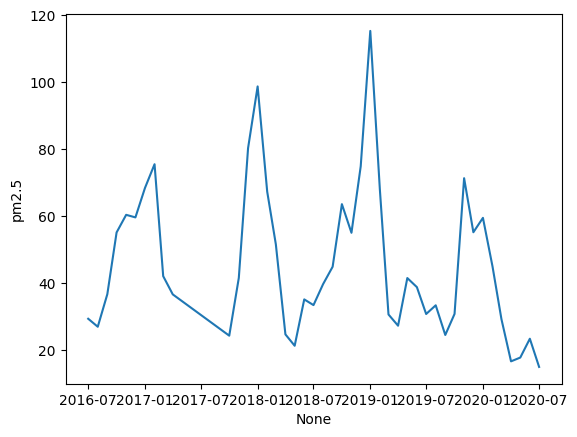

In [101]:
sns.lineplot(y=data_mean_month[data_mean_month['City']=='Visakhapatnam']['pm2.5'],x=data_y )

In [102]:
# data preprocessing

In [103]:
columns=list(set(list(data.columns))-set(['City','AQI_Bucket','Date']))

> #  comparing all pollutant levels with time for every city
 

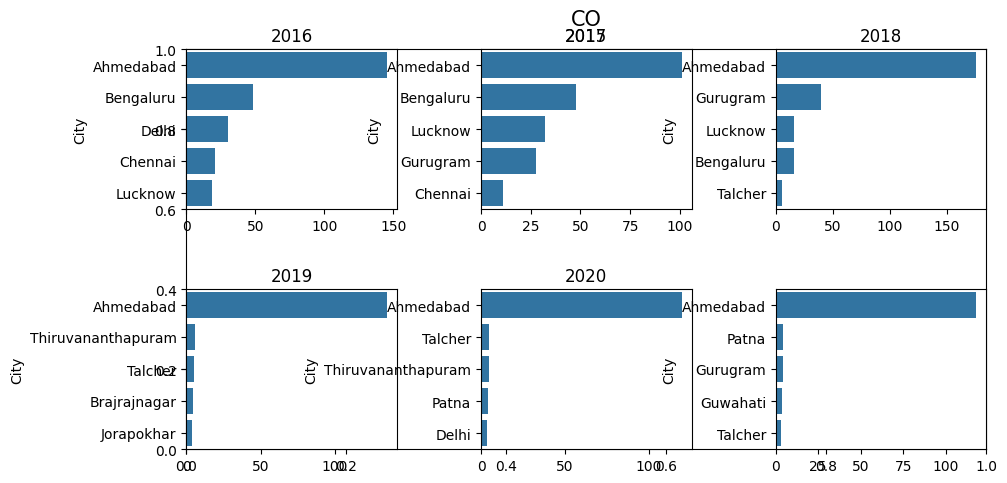

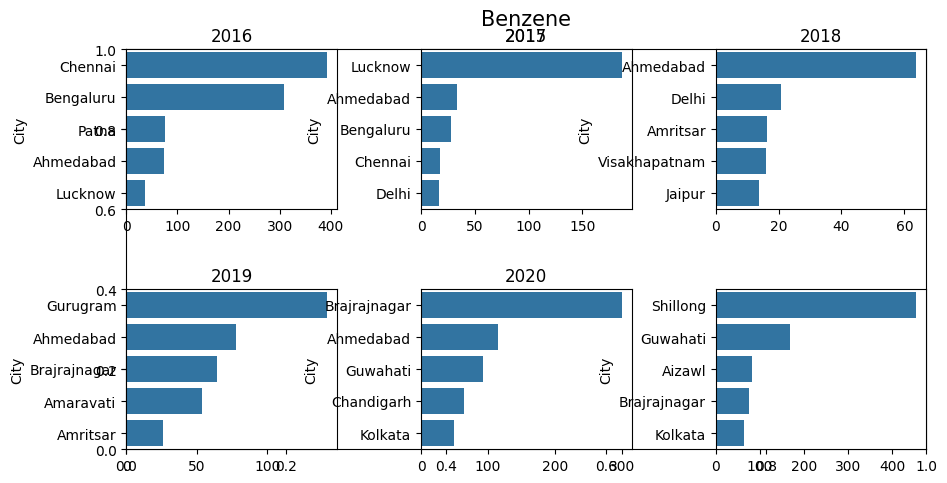

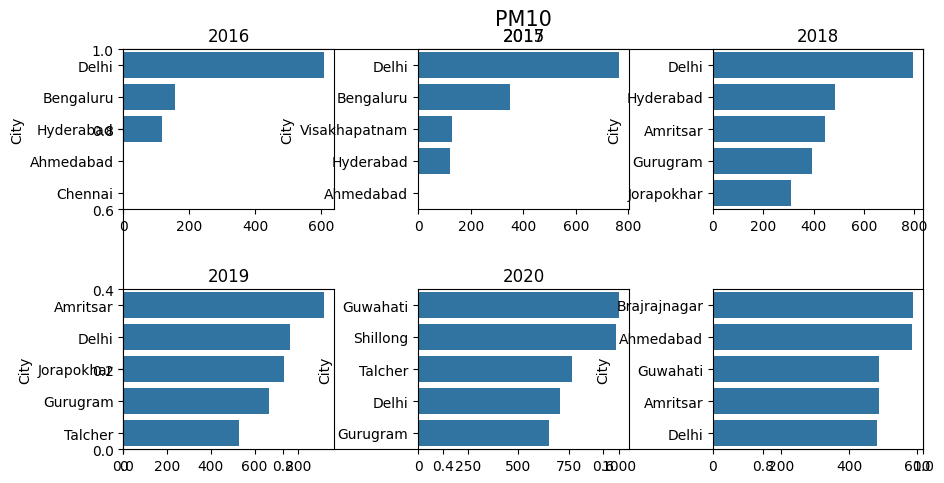

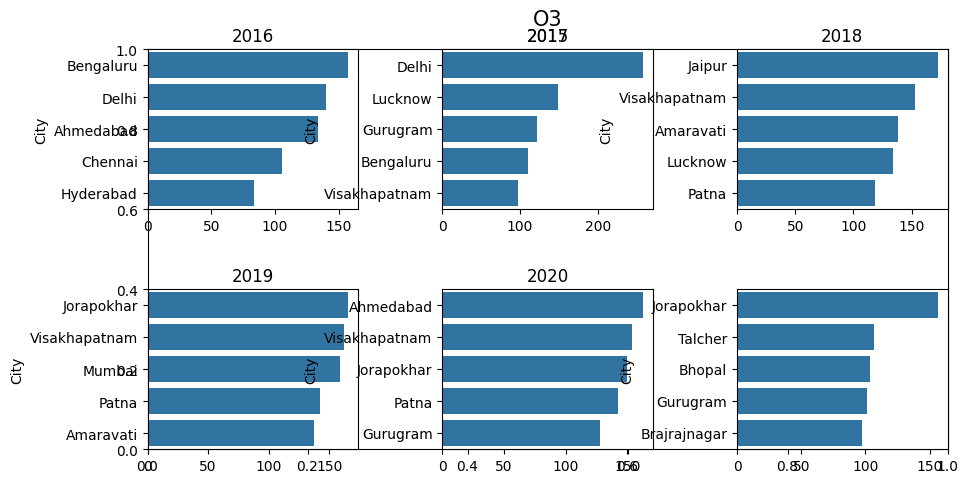

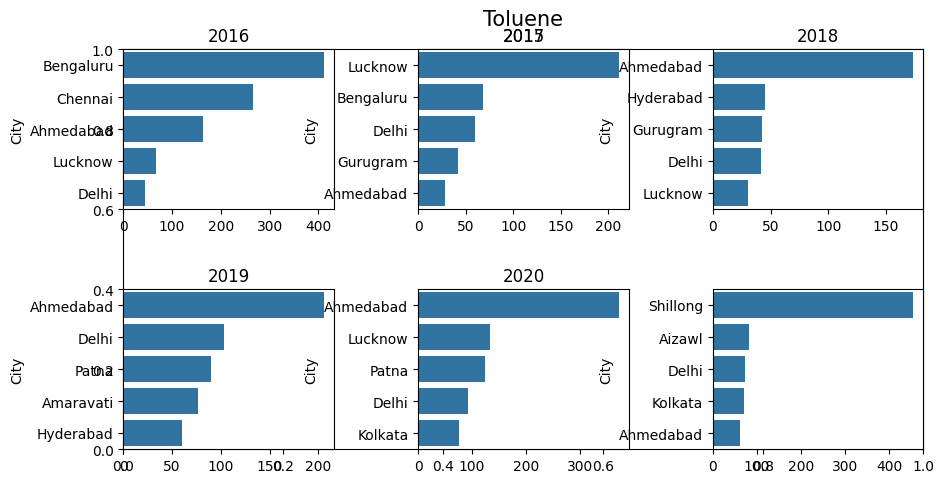

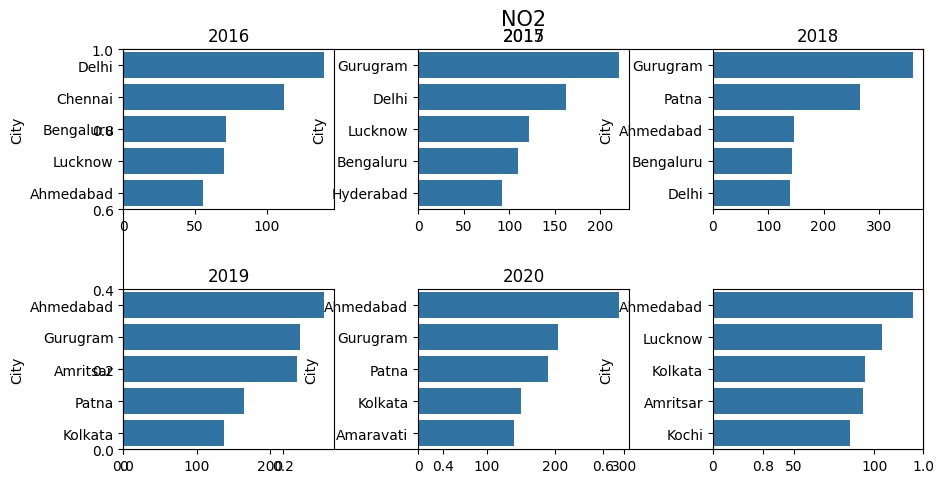

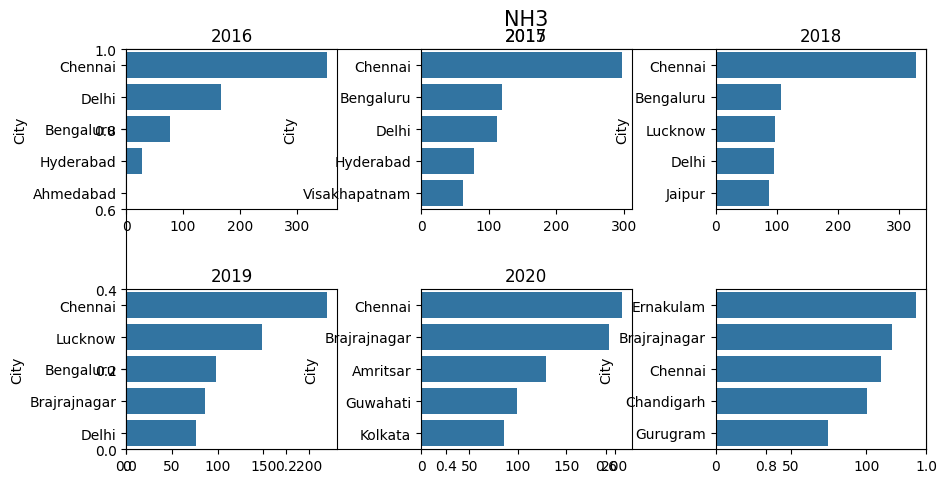

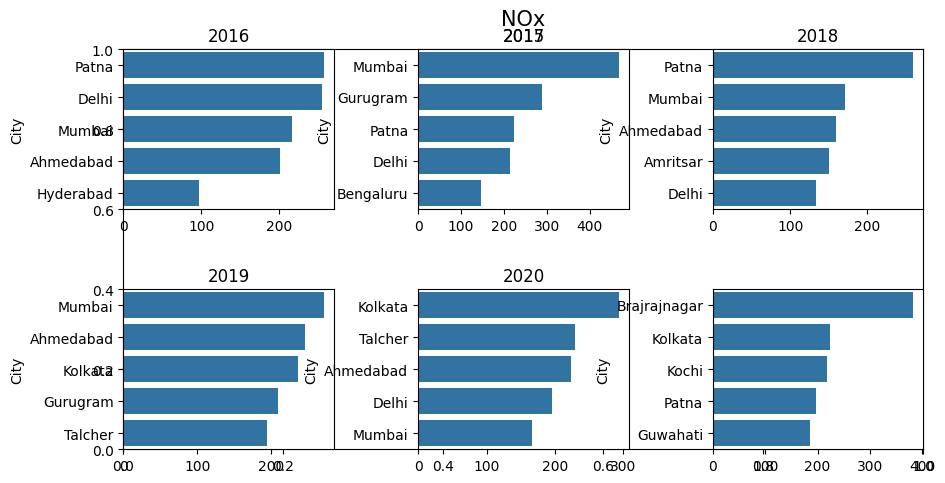

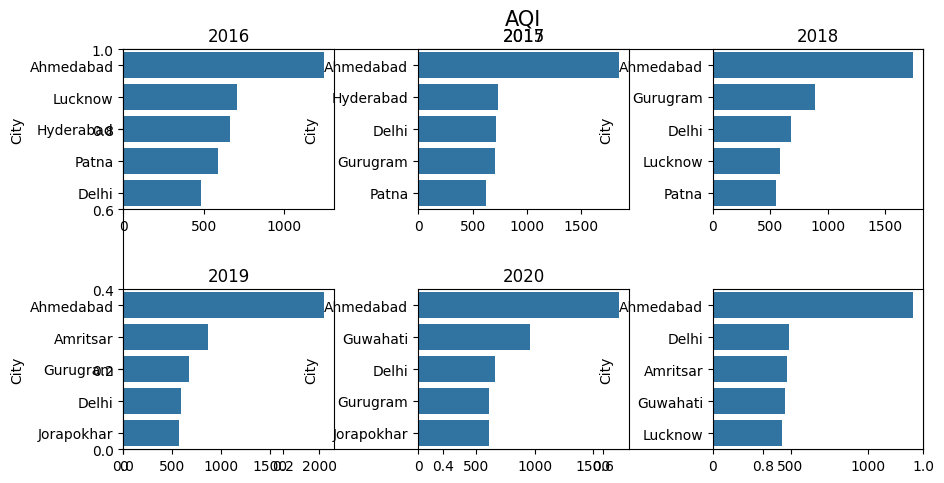

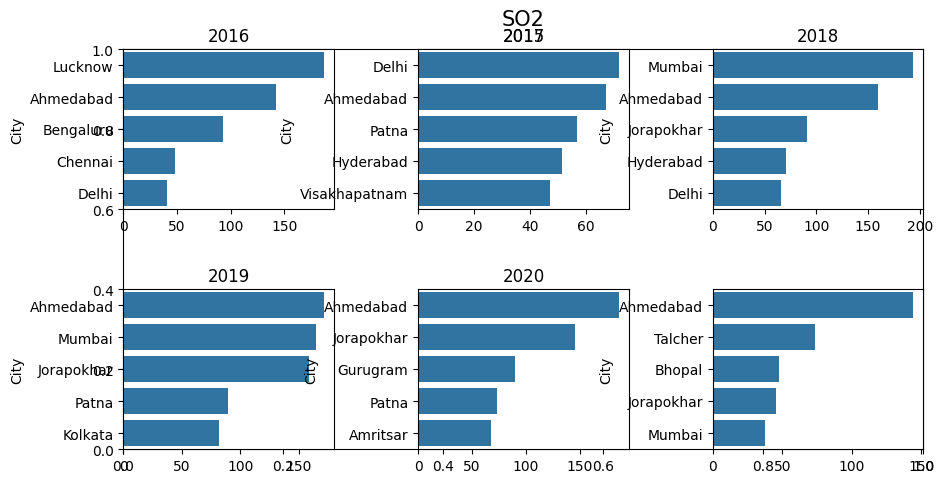

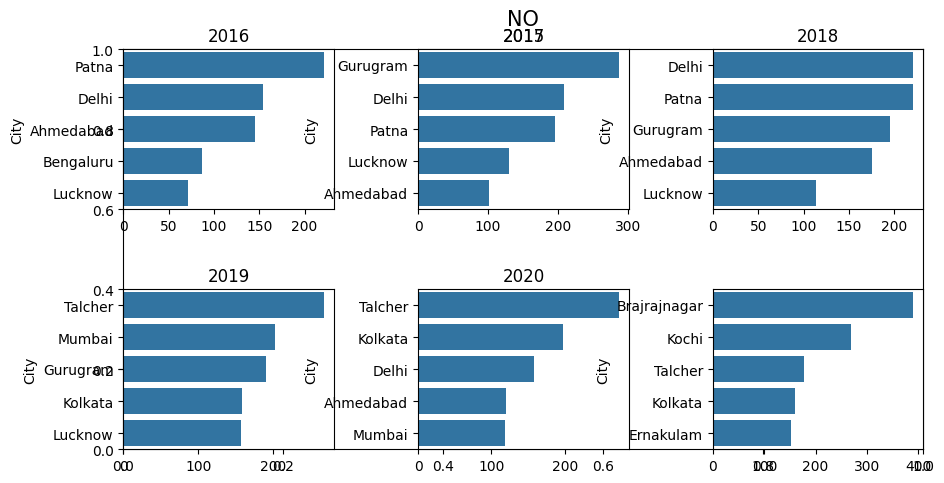

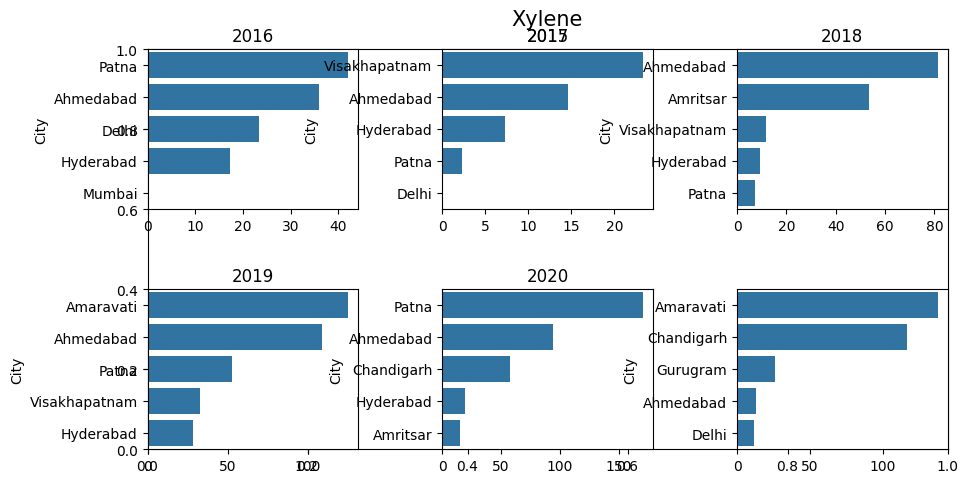

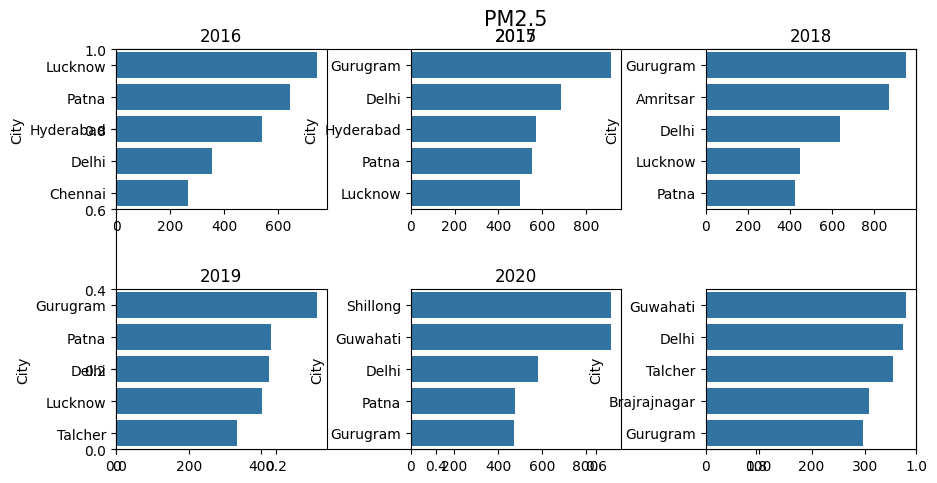

In [104]:
# Top 5 highest pm2.5 level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].max().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

    

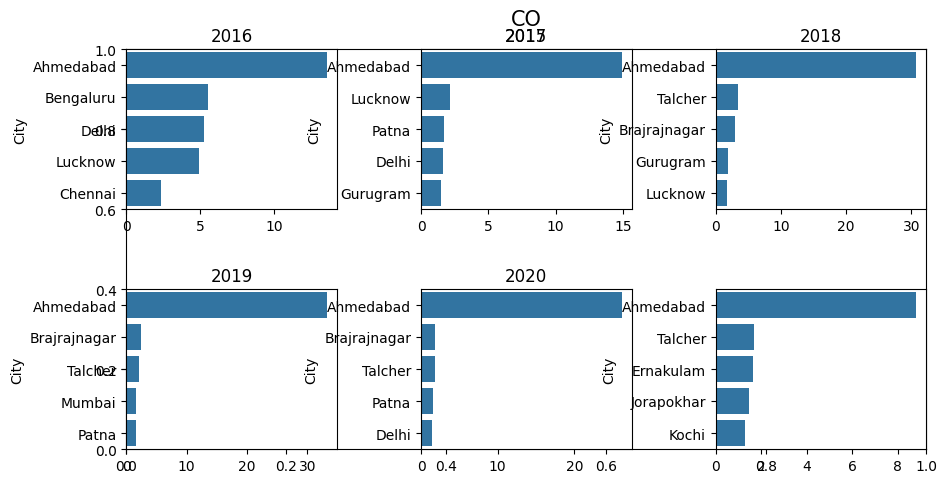

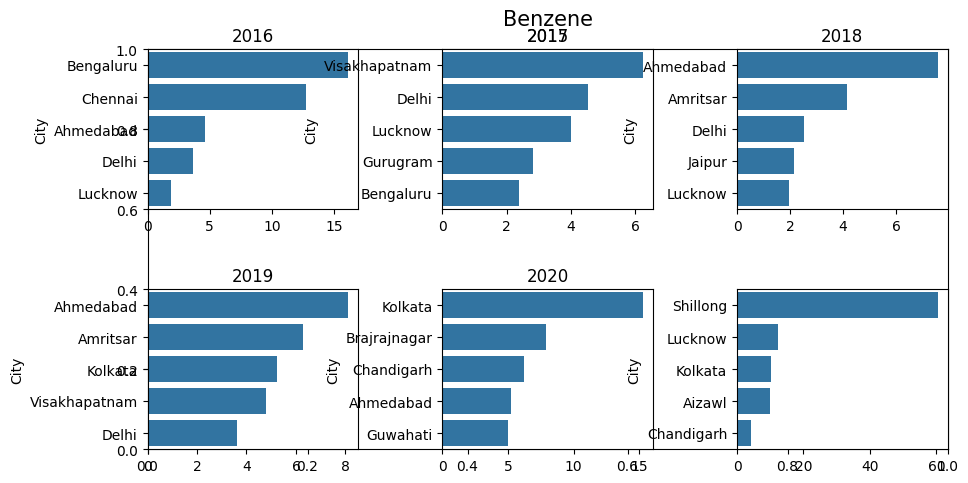

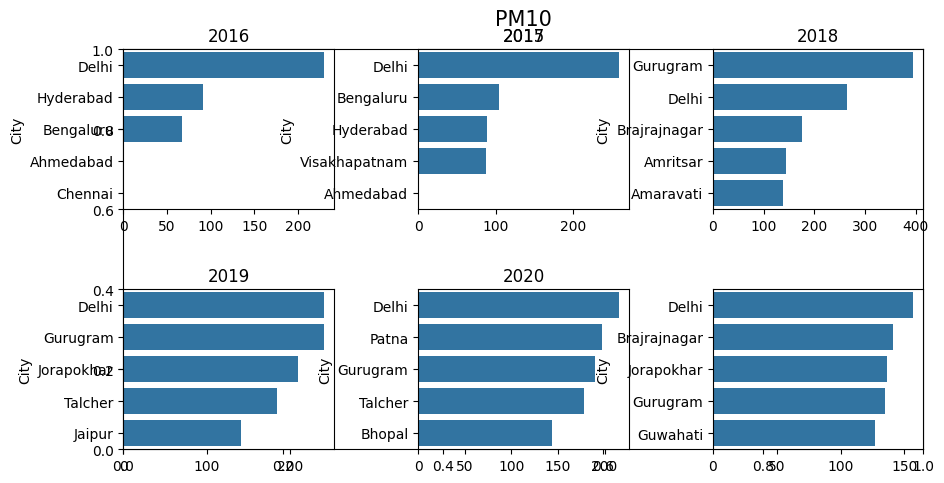

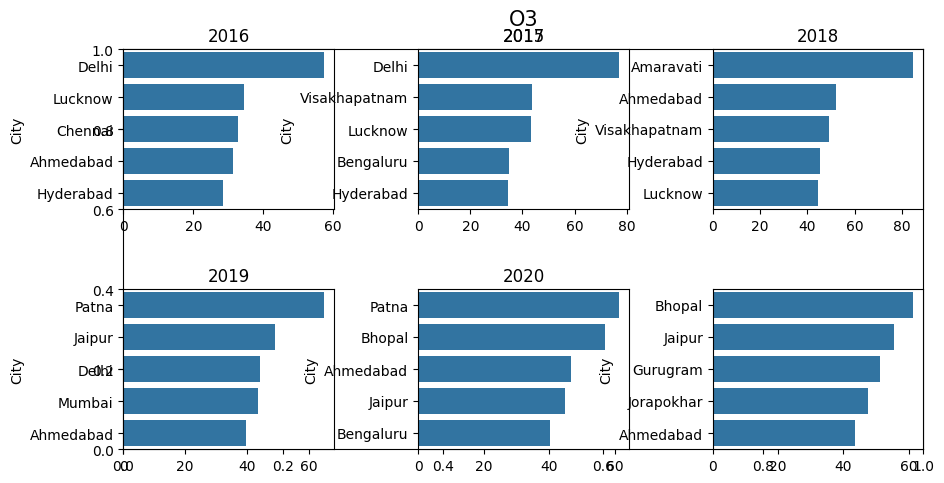

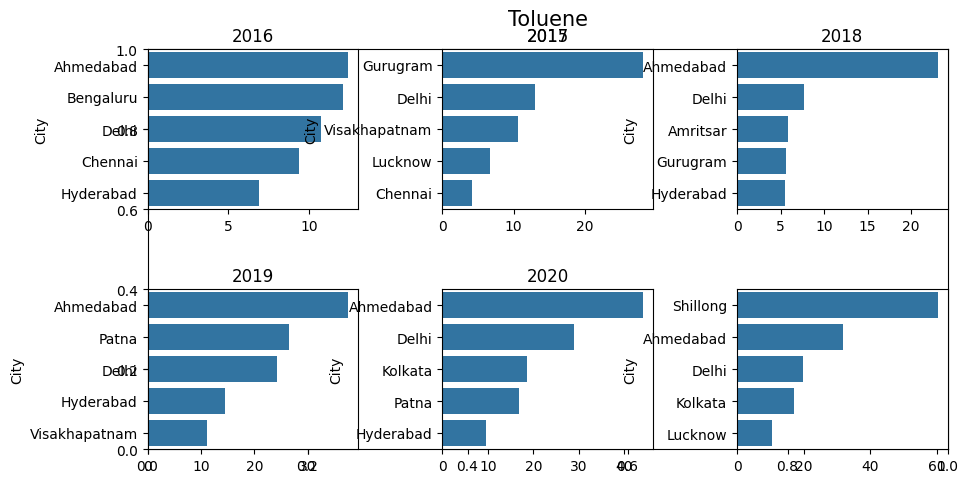

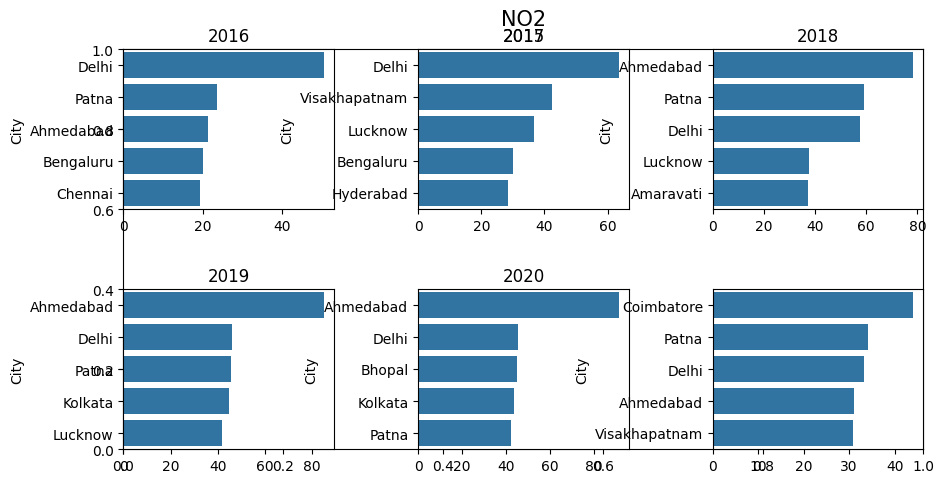

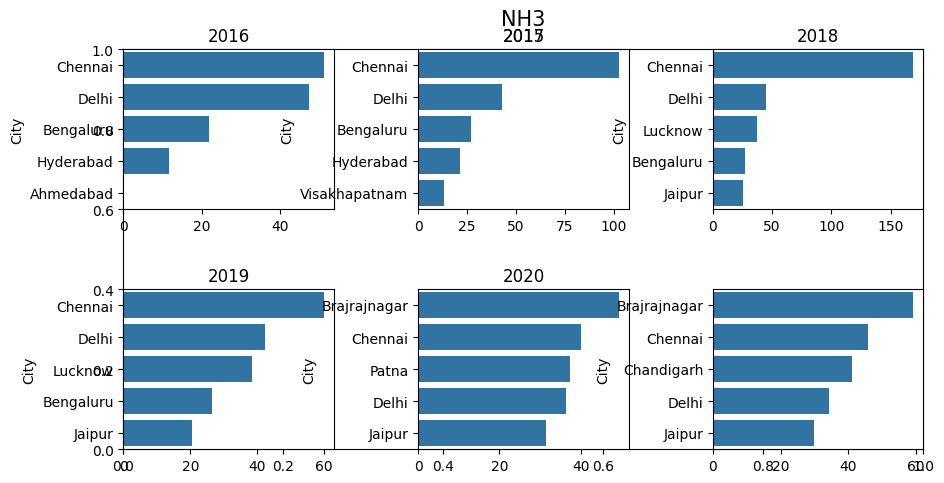

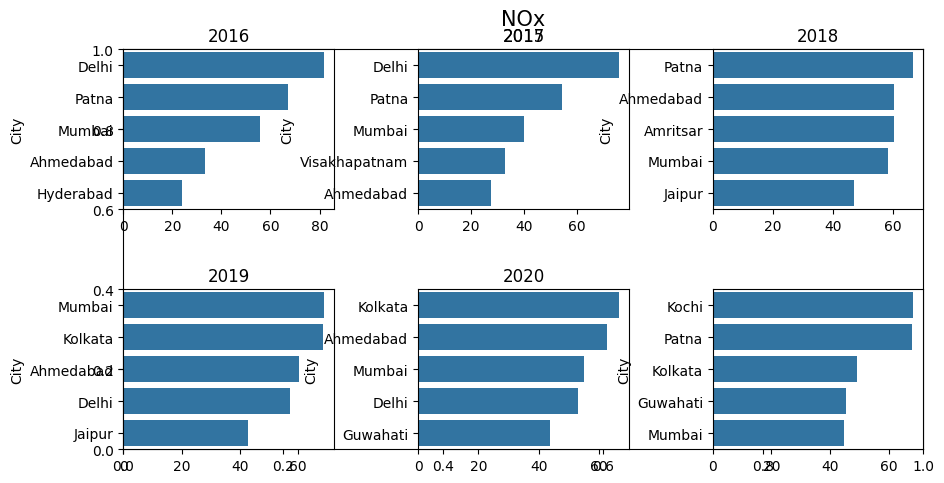

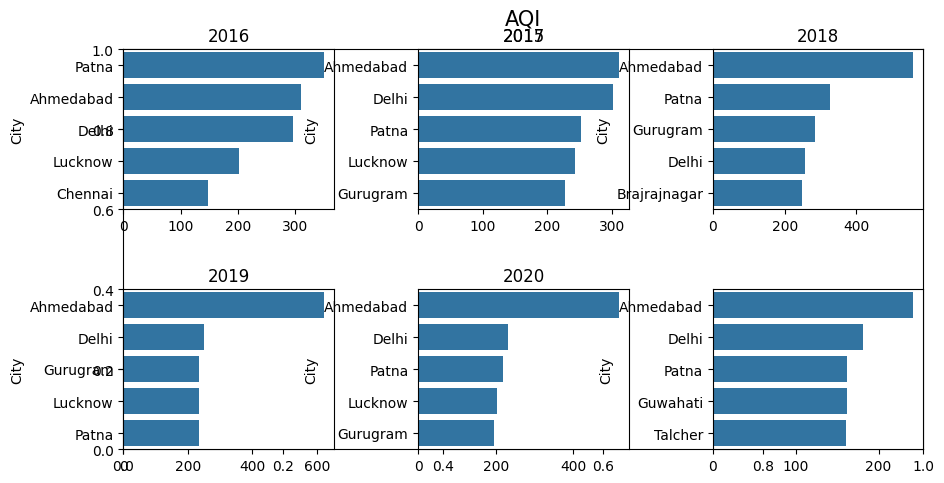

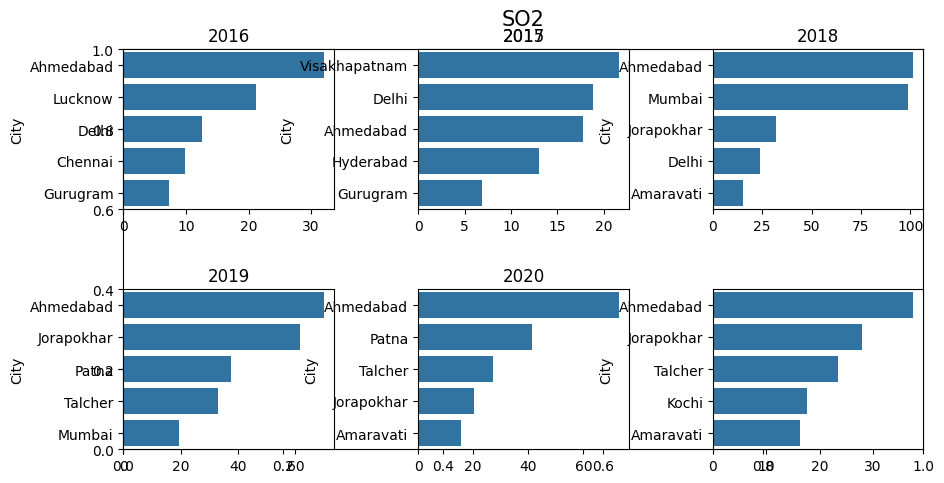

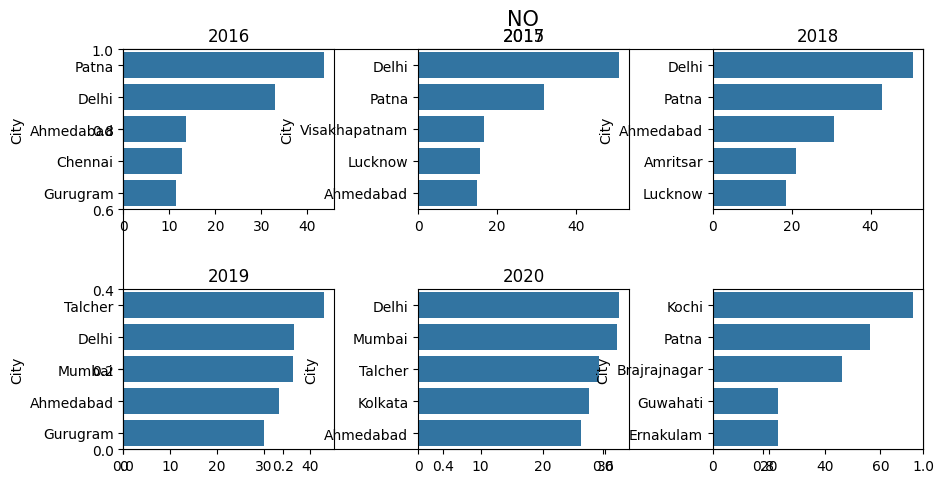

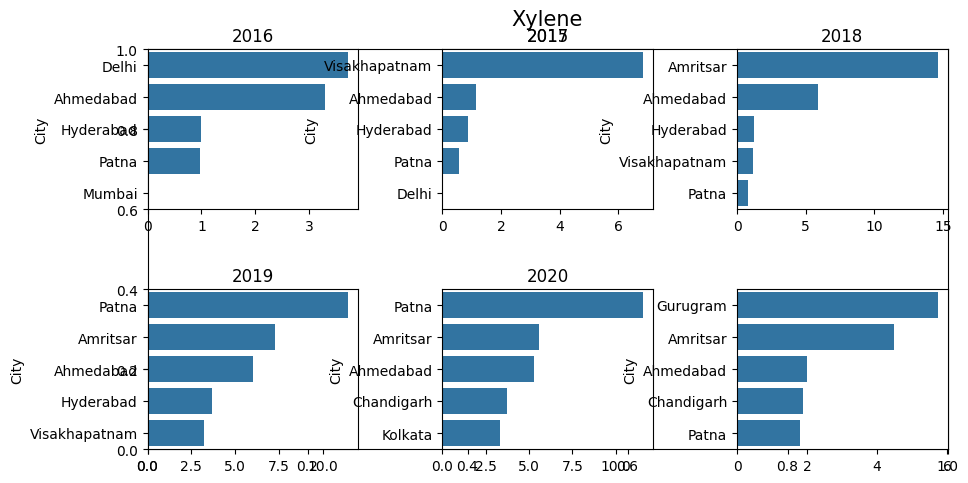

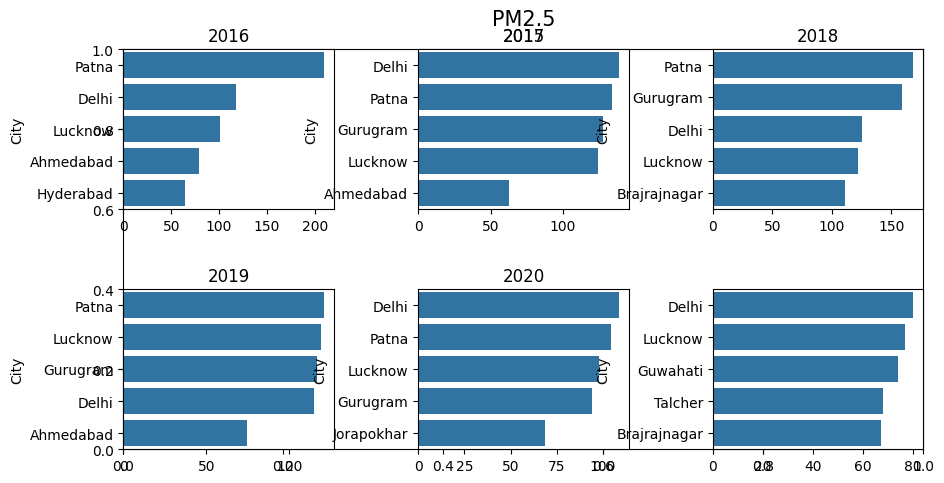

In [105]:
# Top 5 highest pm2.5  mean level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    
    
    

####  Delhi , Ahemedabad , Lucknow, Patna are most consistent in top 5  high mean AQI cities

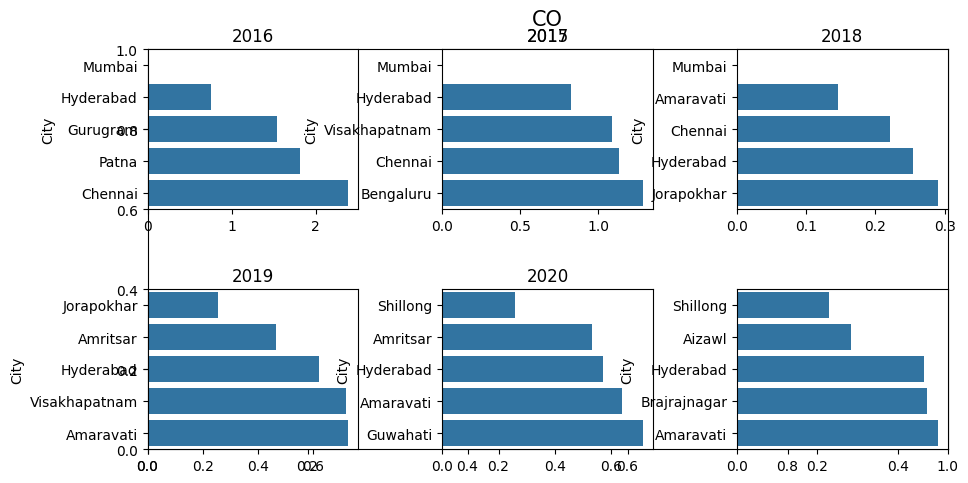

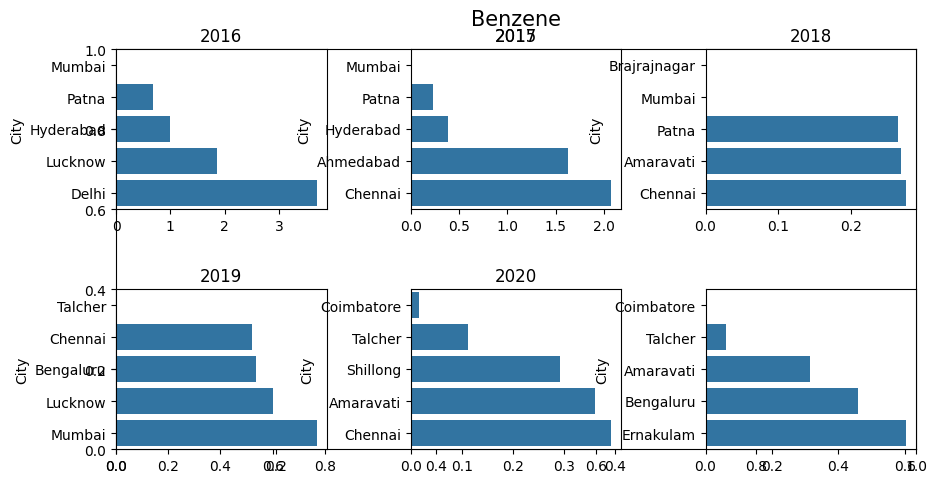

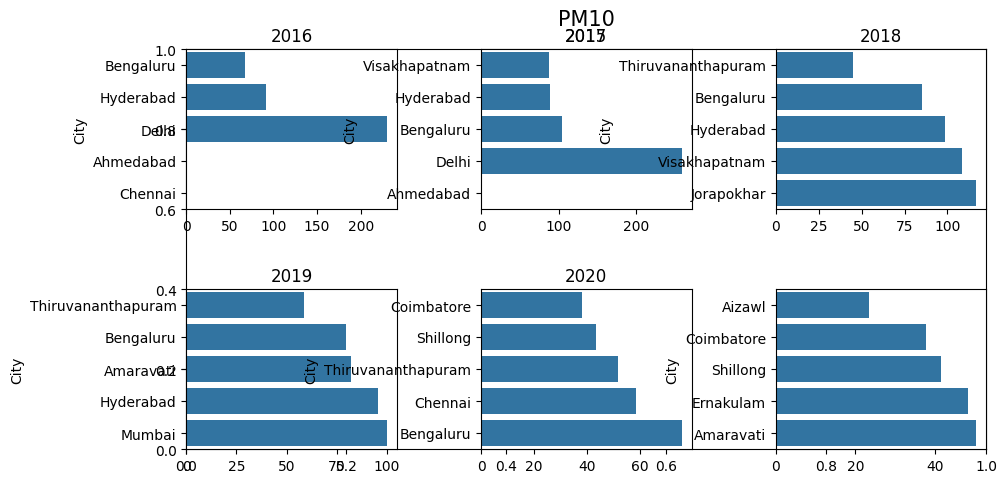

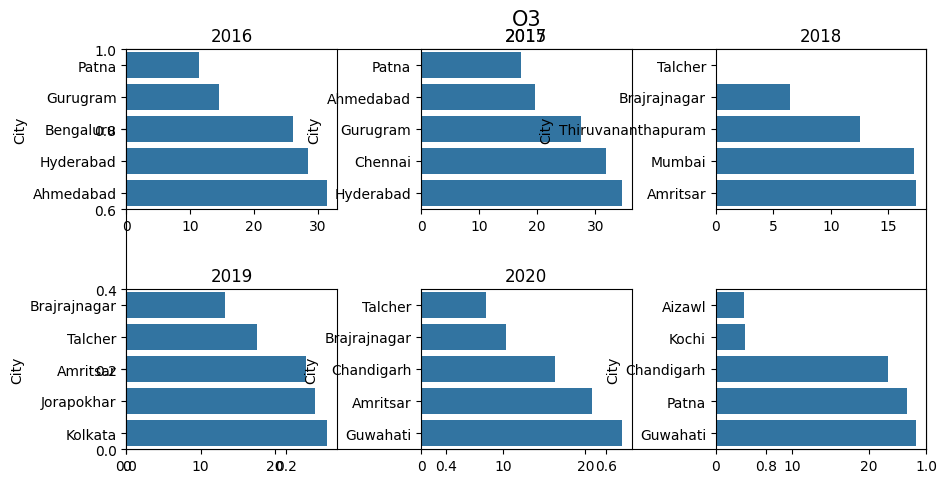

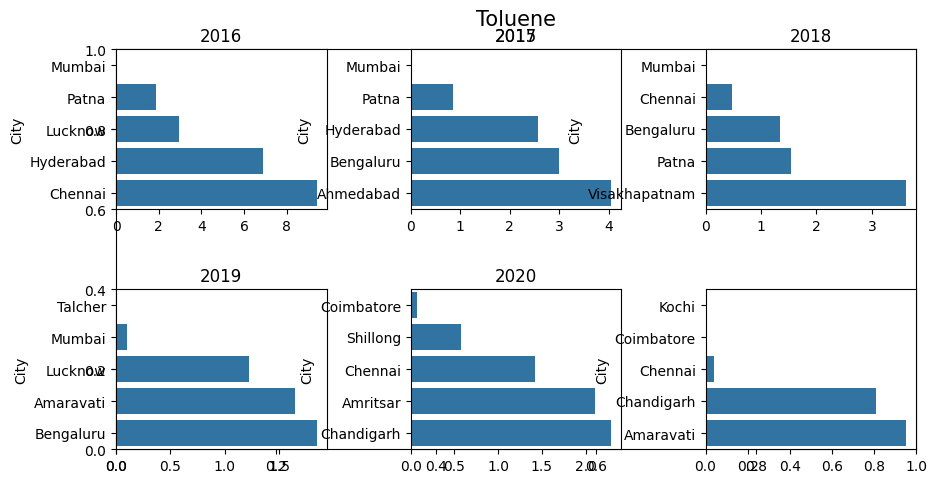

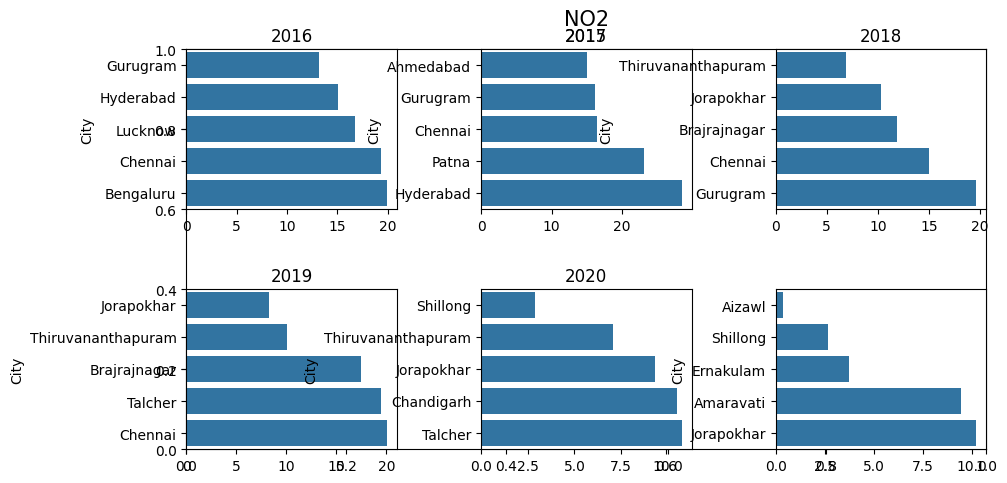

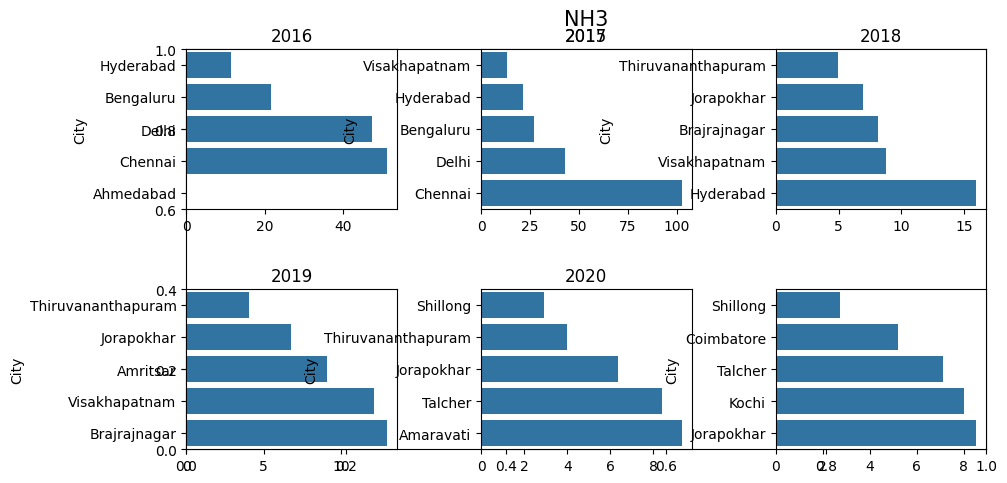

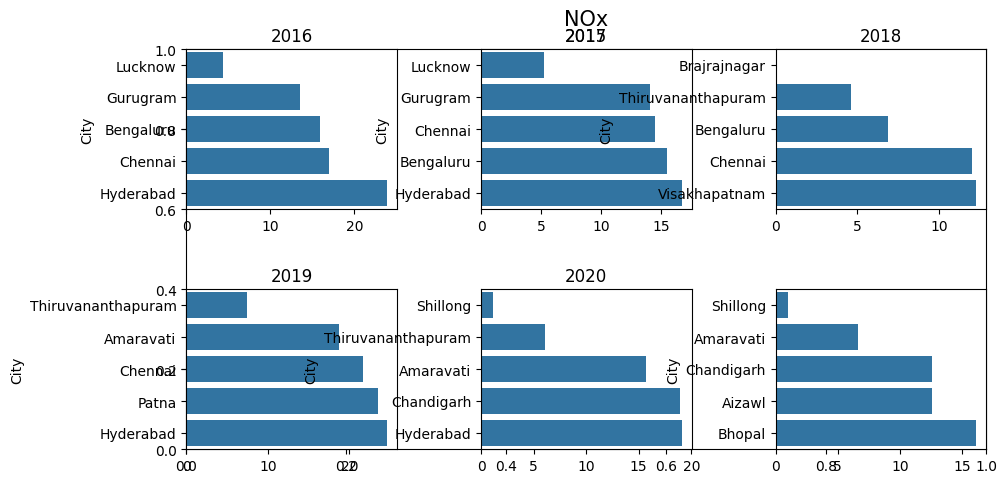

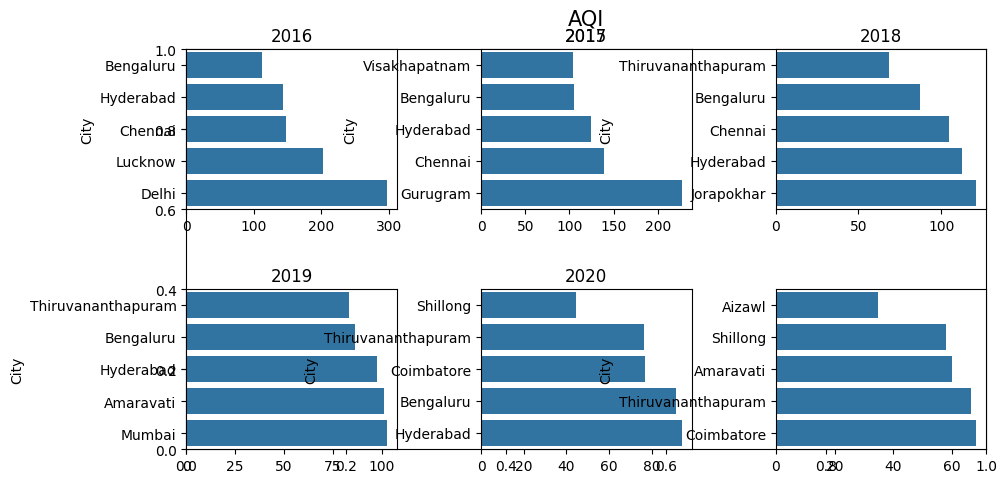

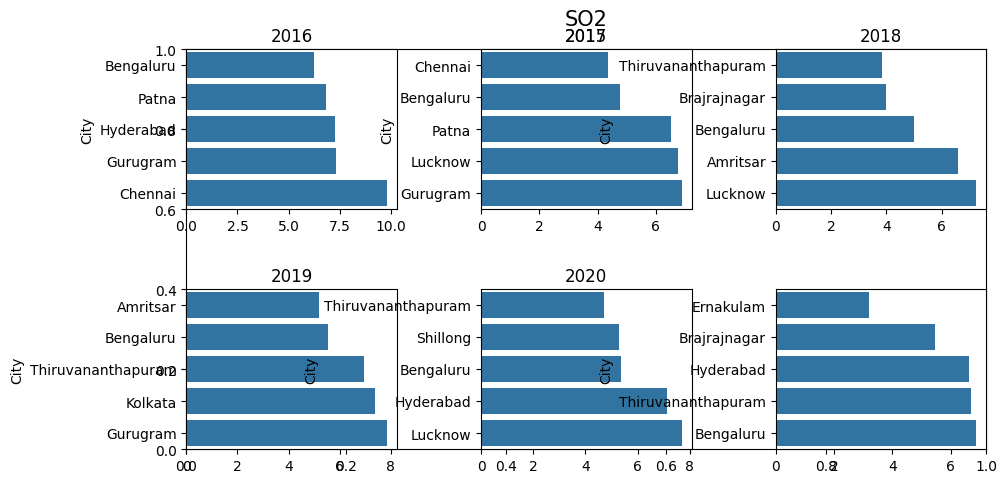

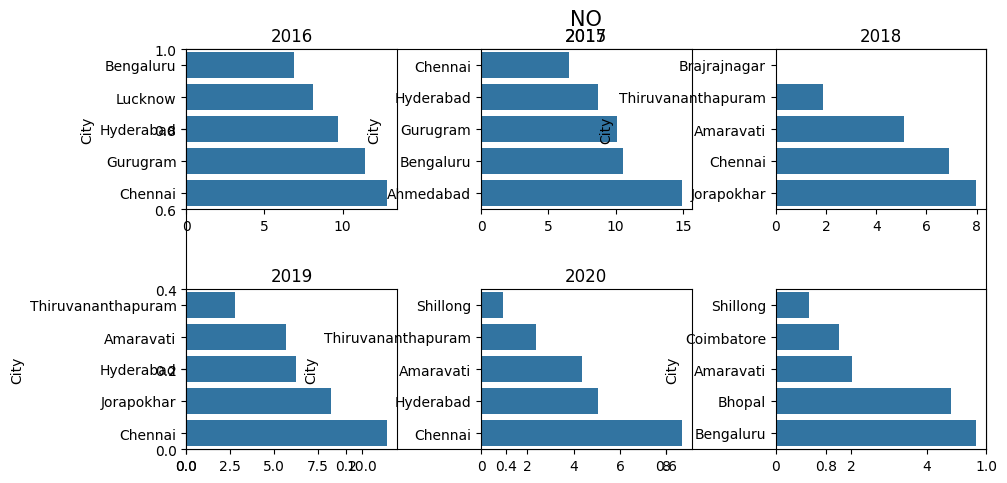

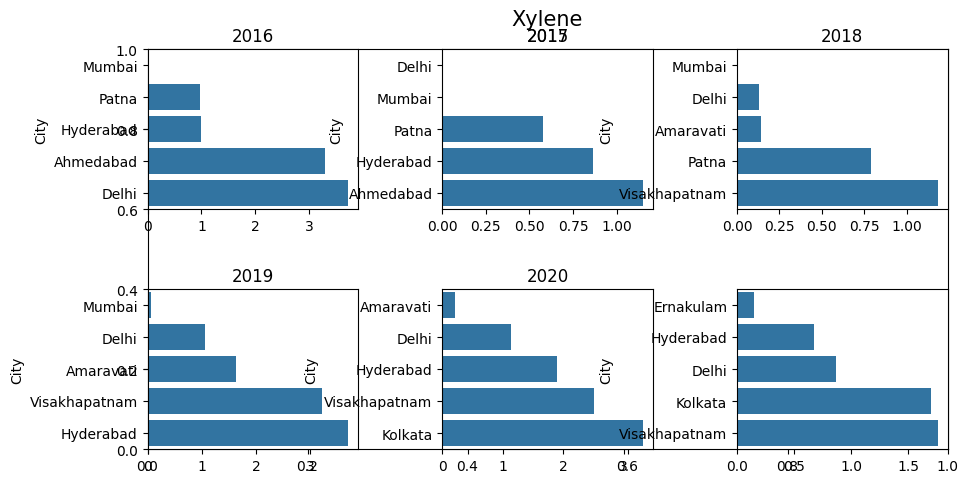

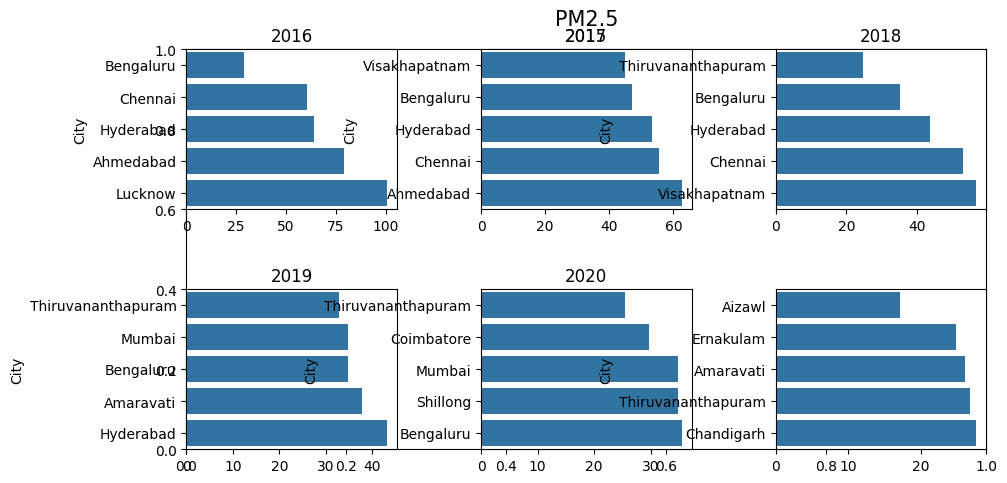

In [106]:
# Top 5 highest pm2.5  mean level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=True).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

#### Thiruvananthapuram, bangalore, hyderabad are consistent top 5 min  mean aqi  list

In [107]:
data[data['City']=='Ahmedabad']['AQI'].isna().mean()

np.float64(0.3359880537580886)

/tmp/ipykernel_397121/598926096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['City']=='Ahmedabad']['AQI'])


<Axes: xlabel='AQI', ylabel='Density'>

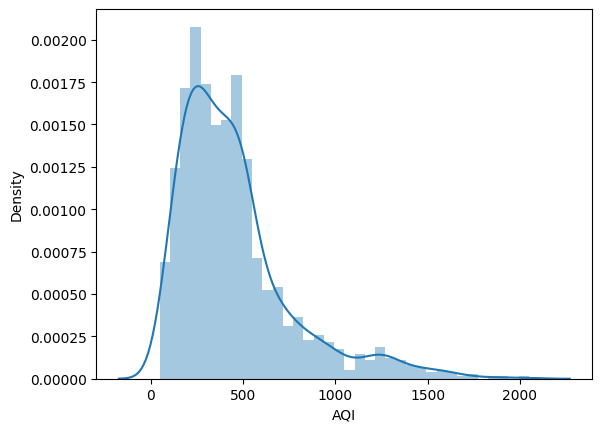

In [108]:
sns.distplot(data[data['City']=='Ahmedabad']['AQI'])

<Axes: >

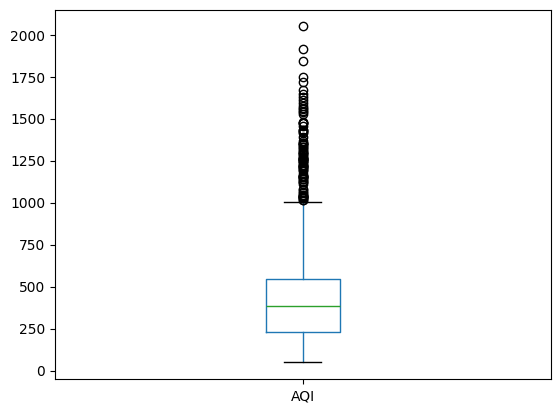

In [109]:
data[data['City']=='Ahmedabad'].boxplot( column =['AQI'], grid = False)

In [110]:
data[data['City']=='Ahmedabad']['AQI'].describe()

count    1334.000000
mean      452.122939
std       311.729553
min        48.000000
25%       231.000000
50%       384.500000
75%       542.750000
max      2049.000000
Name: AQI, dtype: float64

## Data_Cleaning

#### 33.3 % are nulls in ahmedabad AQI values 
#### there are huge number of outliers in the data-
#### AQI -2049 which is highest value in Ahmedabad Data  , Which has never happened in India
#### It has 25 % of AQI values over 500 which is not at all true  when checked it in offfcial websites
#### This indeed showed its effect on TOP mean AQI  cities list  

In [111]:

data[data.Date.dt.year==2015]['AQI'].describe()
#Data about AQI is completely in 2015


count    1827.000000
mean      212.463054
std       133.119404
min        31.000000
25%       114.000000
50%       175.000000
75%       294.000000
max      1247.000000
Name: AQI, dtype: float64

In [112]:
data['AQI'].groupby(data.Date.dt.year).count()

Date
2015    1827
2016    2573
2017    3234
2018    5724
2019    7071
2020    4421
Name: AQI, dtype: int64

In [113]:
(data.groupby([data.Date.dt.year,'City'])['AQI'].count()>300).groupby(level=0).count()
# no of cities in a year  with non Nan AQI value  days  >300 

Date
2015     9
2016    10
2017    17
2018    18
2019    23
2020    26
Name: AQI, dtype: int64

In [114]:
data[data.Date.dt.year==2019].groupby(['City'])['AQI'].mean().sort_values(ascending=True)
# mean aqi in the year 2019 in ascending order

City
Shillong               44.476190
Thiruvananthapuram     76.236467
Coimbatore             77.026596
Bengaluru              91.602740
Hyderabad              93.980822
Amaravati              98.485437
Chennai               102.942466
Mumbai                107.950685
Amritsar              109.500000
Jaipur                120.512329
Visakhapatnam         123.442815
Guwahati              127.560897
Chandigarh            135.547009
Kolkata               143.909589
Brajrajnagar          148.400621
Jorapokhar            157.587459
Bhopal                162.609524
Talcher               169.023102
Gurugram              195.222527
Lucknow               202.561644
Patna                 218.259053
Delhi                 232.104110
Ahmedabad             516.352273
Name: AQI, dtype: float64

/tmp/ipykernel_397121/3917986347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['City']=='Delhi']['AQI'])


<Axes: xlabel='AQI', ylabel='Density'>

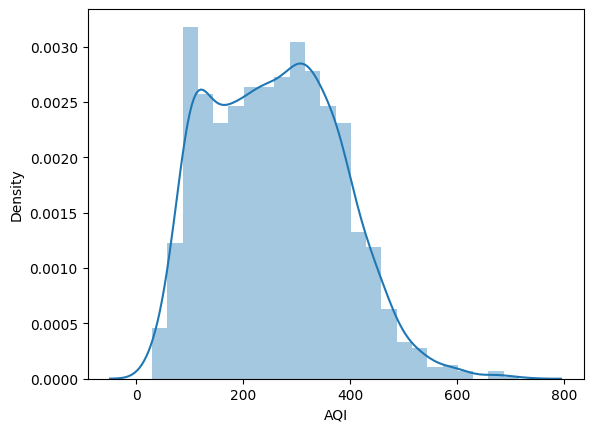

In [115]:
sns.distplot(data[data['City']=='Delhi']['AQI'])

#### *Calculating years with high pollution growth rate over the years*

In [116]:
# calculating years with high pollution growth rate over the years
pd.options.display.max_rows = 100
#(data.groupby(['City',data.Date.dt.year])['AQI'].mean().pct_change())
(data.groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

/tmp/ipykernel_397121/397589900.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  (data.groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)


City
Chandigarh           -0.473278
Amaravati            -0.297994
Bhopal               -0.294313
Brajrajnagar         -0.164219
Amritsar             -0.143305
Kolkata              -0.129188
Jaipur               -0.121197
Patna                -0.118666
Coimbatore           -0.114608
Hyderabad            -0.113189
Chennai              -0.109377
Delhi                -0.089743
Talcher              -0.069656
Gurugram             -0.068835
Bengaluru            -0.062941
Lucknow              -0.038921
Visakhapatnam        -0.018590
Thiruvananthapuram    0.000564
Mumbai                0.005714
Ahmedabad             0.042247
Jorapokhar            0.100490
Guwahati              0.266126
Shillong              0.302485
Aizawl                     NaN
Ernakulam                  NaN
Kochi                      NaN
Name: AQI, dtype: float64

#### If we observe AQI of most cities has seen  signifacant decline due to covid-19
#### So removing 2020 

In [117]:
pd.options.display.max_rows = 10
data.groupby(['City',data.Date.dt.year])['AQI'].mean()


City           Date
Ahmedabad      2015    310.950570
               2016    310.162393
               2017    558.768116
               2018    622.263305
               2019    516.352273
                          ...    
Visakhapatnam  2016    103.976048
               2017    143.094340
               2018    122.819018
               2019    123.442815
               2020     84.685393
Name: AQI, Length: 103, dtype: float64

#### calculating years with high pollution growth rate over the years (without 2020 )

In [118]:
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).pct_change().groupby(level=0).mean()
pd.options.display.max_rows = 100
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

/tmp/ipykernel_397121/2852841466.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  (data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).pct_change().groupby(level=0).mean()
/tmp/ipykernel_397121/2852841466.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  (data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)


City
Amaravati            -0.250994
Brajrajnagar         -0.208279
Amritsar             -0.139509
Jaipur               -0.117934
Hyderabad            -0.099440
Talcher              -0.090025
Patna                -0.084180
Chennai              -0.081615
Kolkata              -0.073437
Delhi                -0.057858
Bengaluru            -0.046234
Gurugram             -0.029343
Lucknow               0.007425
Mumbai                0.052024
Thiruvananthapuram    0.064937
Visakhapatnam         0.079870
Ahmedabad             0.185608
Jorapokhar            0.189596
Bhopal                     NaN
Chandigarh                 NaN
Coimbatore                 NaN
Guwahati                   NaN
Shillong                   NaN
Name: AQI, dtype: float64

#### Cities with mean highest AQI month over the years

In [119]:

data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()

City
Ahmedabad                     (Ahmedabad, 11)
Aizawl                            (Aizawl, 3)
Amaravati                     (Amaravati, 12)
Amritsar                       (Amritsar, 11)
Bengaluru                      (Bengaluru, 1)
Bhopal                           (Bhopal, 11)
Brajrajnagar                (Brajrajnagar, 1)
Chandigarh                   (Chandigarh, 11)
Chennai                          (Chennai, 1)
Coimbatore                   (Coimbatore, 10)
Delhi                             (Delhi, 11)
Ernakulam                      (Ernakulam, 1)
Gurugram                       (Gurugram, 11)
Guwahati                        (Guwahati, 1)
Hyderabad                      (Hyderabad, 1)
Jaipur                           (Jaipur, 11)
Jorapokhar                   (Jorapokhar, 11)
Kochi                              (Kochi, 1)
Kolkata                          (Kolkata, 1)
Lucknow                         (Lucknow, 11)
Mumbai                           (Mumbai, 12)
Patna                        

#### Most of them are in winter season

#### list of cities having highest AQI levels in a particula month

<Axes: ylabel='count'>

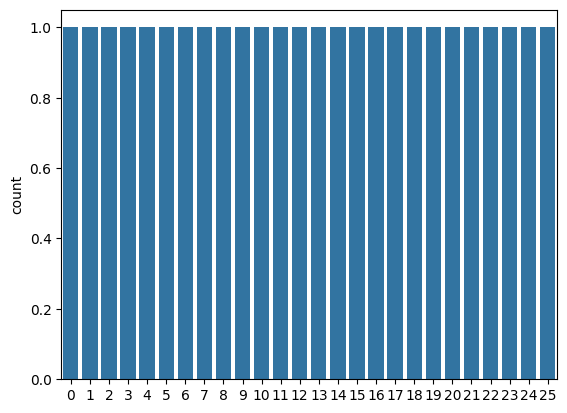

In [120]:
# list of cities having highest AQI levels in a particula month
y=data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()
count_month=[i[1] for i in y]
sns.countplot(count_month)


#### As Can be seen most cities have highest AQI levels in January, Novemeber , December which is winter season in Indian subcontinent

In [121]:
data_pre=data.copy()
data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29526    5.0
29527    4.0
29528    4.0
29529    4.0
29530    5.0
Name: AQI_Bucket, Length: 29531, dtype: float64

In [122]:
data_pre['AQI_Rank']=data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})
data_pre

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  \
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN   
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN   
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN   
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN   
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN   
...      ...    ...     ...      ...      ...     ...   ...           ...   
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good   
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory   
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory   
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory   
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good   

       AQI_Rank  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
29526       5.0  
29527       4.0  
29528       4.0  
29529       4.0  
29530       5.0  

[29531 rows x 17 columns]

([<matplotlib.patches.Wedge at 0x7f90f58c6490>,
 [Text(1.099996949643619, 0.002590516306342755, 'Good'),
  Text(0.9802247778505587, 0.49915867706353956, 'Moderate'),
  Text(0.08023474774775446, 1.0970699090093823, 'Poor'),
  Text(-0.6108580741801553, 0.9147963780038223, 'Satisfactory'),
  Text(-0.8941625006201033, -0.6406819979403231, 'Severe'),
  Text(0.9607250765886204, -0.5357306480068037, 'Very Poor')])

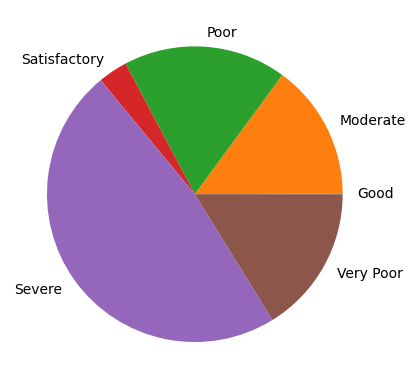

In [123]:
pd.options.display.max_rows = 1000

x=data_pre[data_pre['City']=='Ahmedabad'].groupby(['City','AQI_Bucket'])['AQI_Bucket'].count()
plt.pie(x/data_pre.groupby(['City'])['AQI_Bucket'].count(),labels=[i[1] for i in x.index])




<Axes: xlabel='City'>

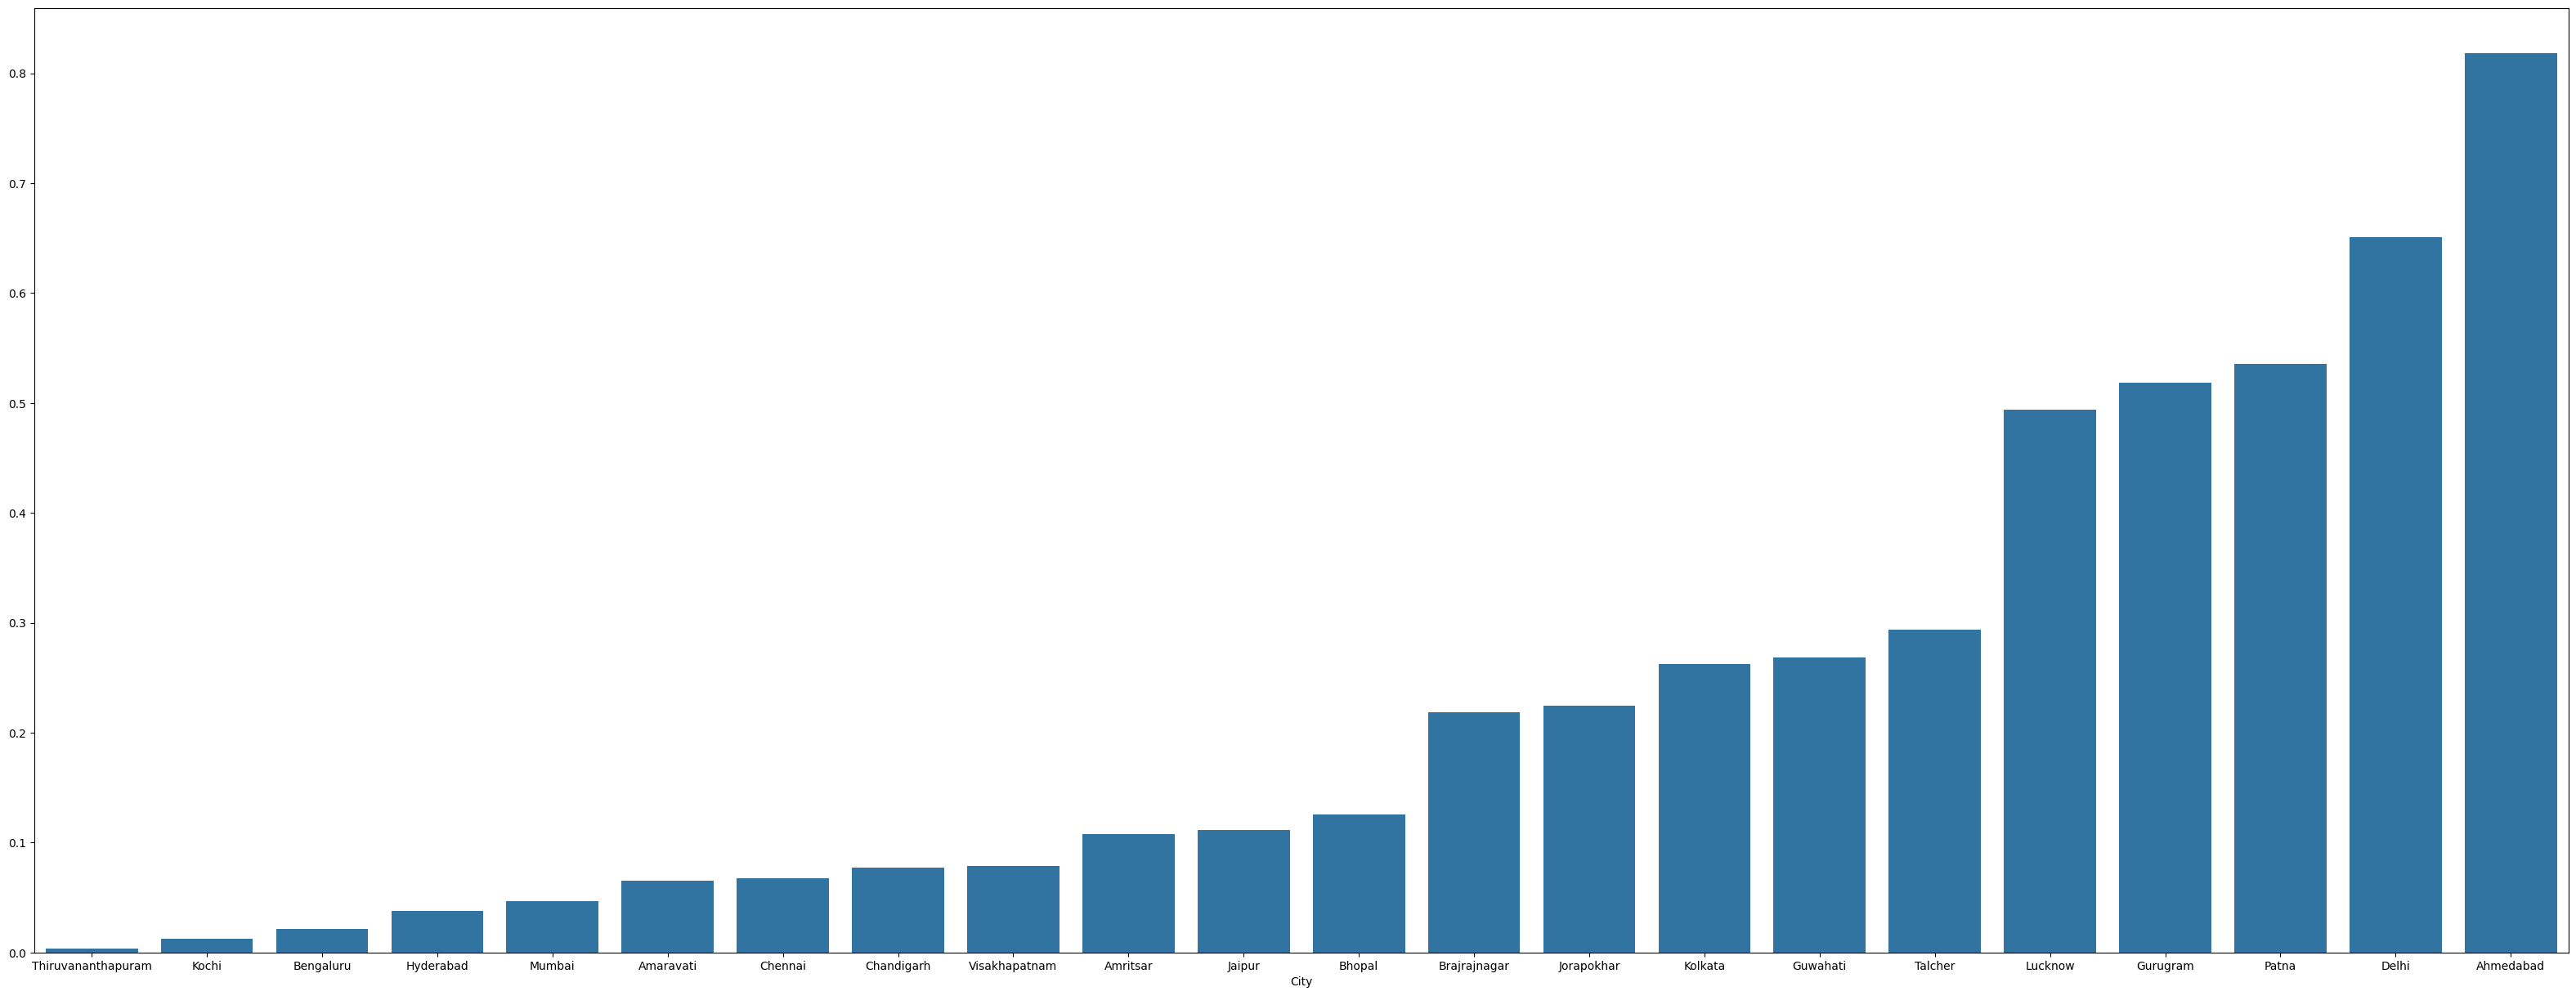

In [124]:
# percentage of total days in a city where it has AQI level equal to or above moderate level
y=data_pre[data_pre['AQI_Rank']<=2].groupby(['City'])['AQI_Rank'].count()/data_pre.groupby(['City'])['AQI_Bucket'].count()
y.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(40, 15))
sns.barplot(x=y.sort_values().index,y=y.sort_values().values)


#### Ahmedabad , Delhi, Patna , Lucknow, Gurugram have AQI level  poor or worse almost half of the time

In [125]:
dataset=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year<2019  )]['AQI'].dropna()

In [126]:
dataset=np.array(dataset)

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dropout

In [128]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [129]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


972 479


In [130]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [131]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [132]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [133]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


941/941 - 2s - 2ms/step - loss: 0.0418
Epoch 2/100
Epoch 2/100
941/941 - 1s - 727us/step - loss: 0.0415
Epoch 3/100
941/941 - 1s - 727us/step - loss: 0.0415
Epoch 3/100
941/941 - 1s - 729us/step - loss: 0.0365
Epoch 4/100
941/941 - 1s - 729us/step - loss: 0.0365
Epoch 4/100
941/941 - 1s - 774us/step - loss: 0.0362
Epoch 5/100
941/941 - 1s - 774us/step - loss: 0.0362
Epoch 5/100
941/941 - 1s - 738us/step - loss: 0.0411
Epoch 6/100
941/941 - 1s - 738us/step - loss: 0.0411
Epoch 6/100
941/941 - 1s - 736us/step - loss: 0.0352
Epoch 7/100
941/941 - 1s - 736us/step - loss: 0.0352
Epoch 7/100
941/941 - 1s - 724us/step - loss: 0.0404
Epoch 8/100
941/941 - 1s - 724us/step - loss: 0.0404
Epoch 8/100
941/941 - 1s - 712us/step - loss: 0.0390
Epoch 9/100
941/941 - 1s - 712us/step - loss: 0.0390
Epoch 9/100
941/941 - 1s - 713us/step - loss: 0.0384
Epoch 10/100
941/941 - 1s - 713us/step - loss: 0.0384
Epoch 10/100
941/941 - 1s - 718us/step - loss: 0.0403
Epoch 11/100
941/941 - 1s - 718us/step - loss:

In [134]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Score: 70.49 RMSE
Test Score: 69.08 RMSE
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Score: 70.49 RMSE
Test Score: 69.08 RMSE


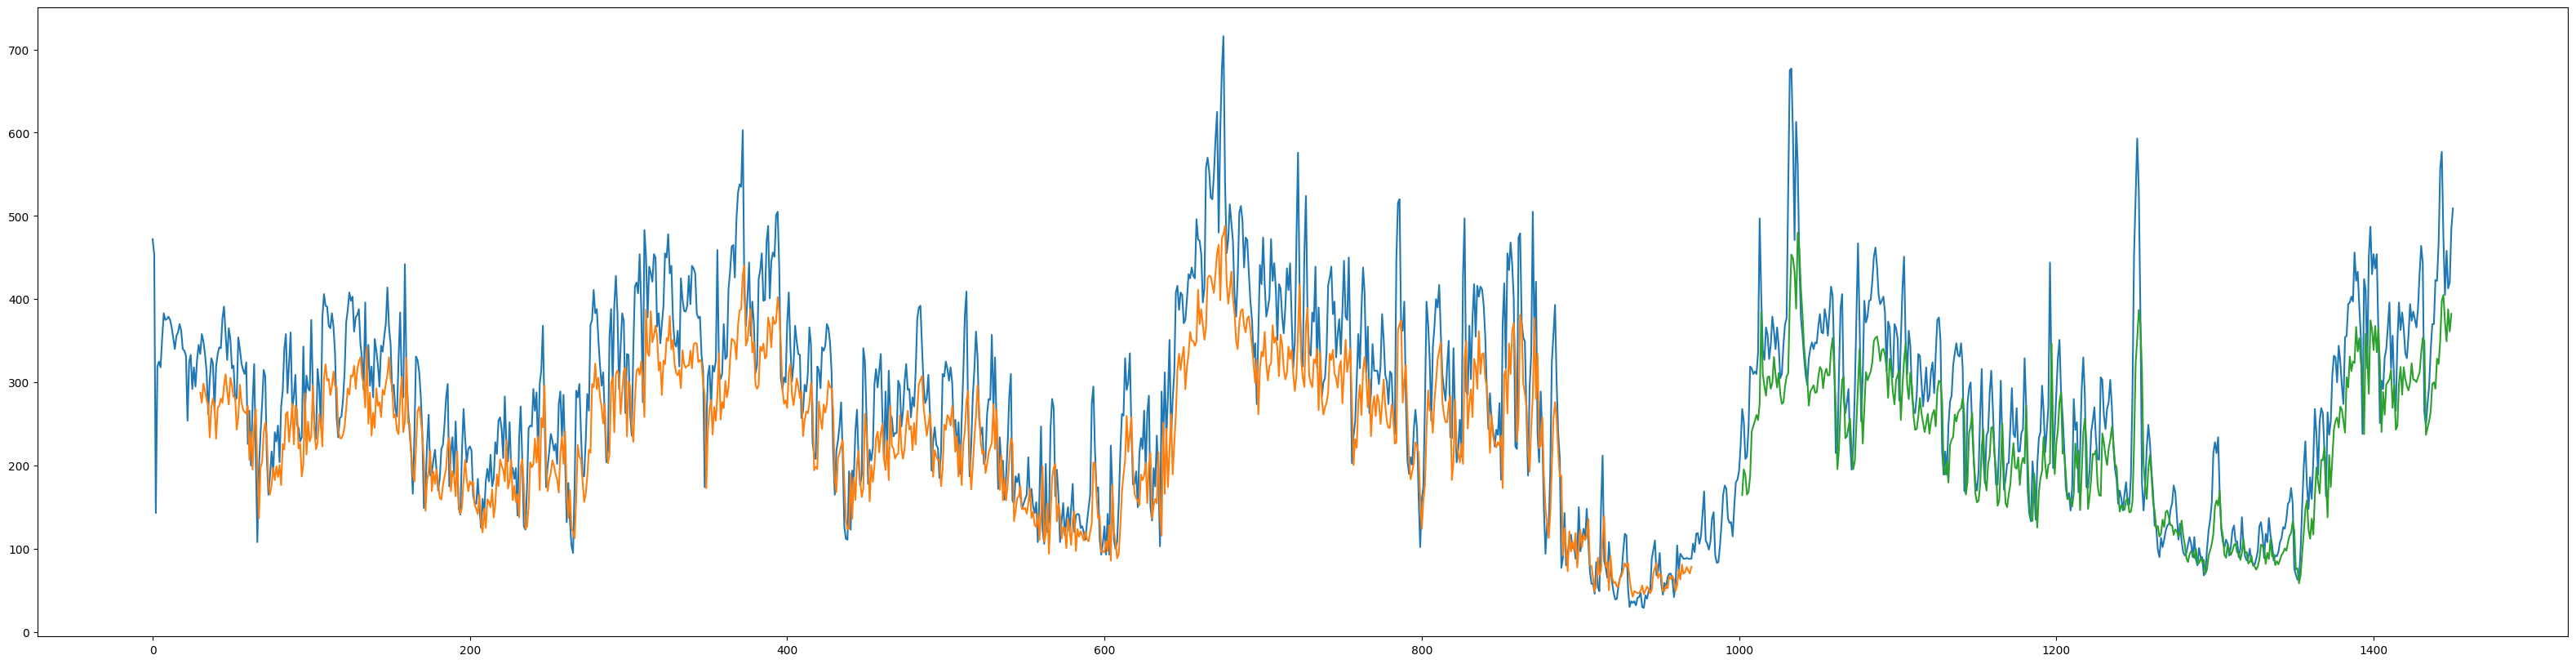

In [135]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [136]:
# predicting 2020 AQI 
data20=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year==2020  )]['AQI'].dropna()
dataset=np.array(data20)
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [137]:
testX, testY = create_dataset(dataset, look_back)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# make predictions
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Score: 38.15 RMSE
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Score: 38.15 RMSE


In [138]:
dataset.shape

(183, 1)

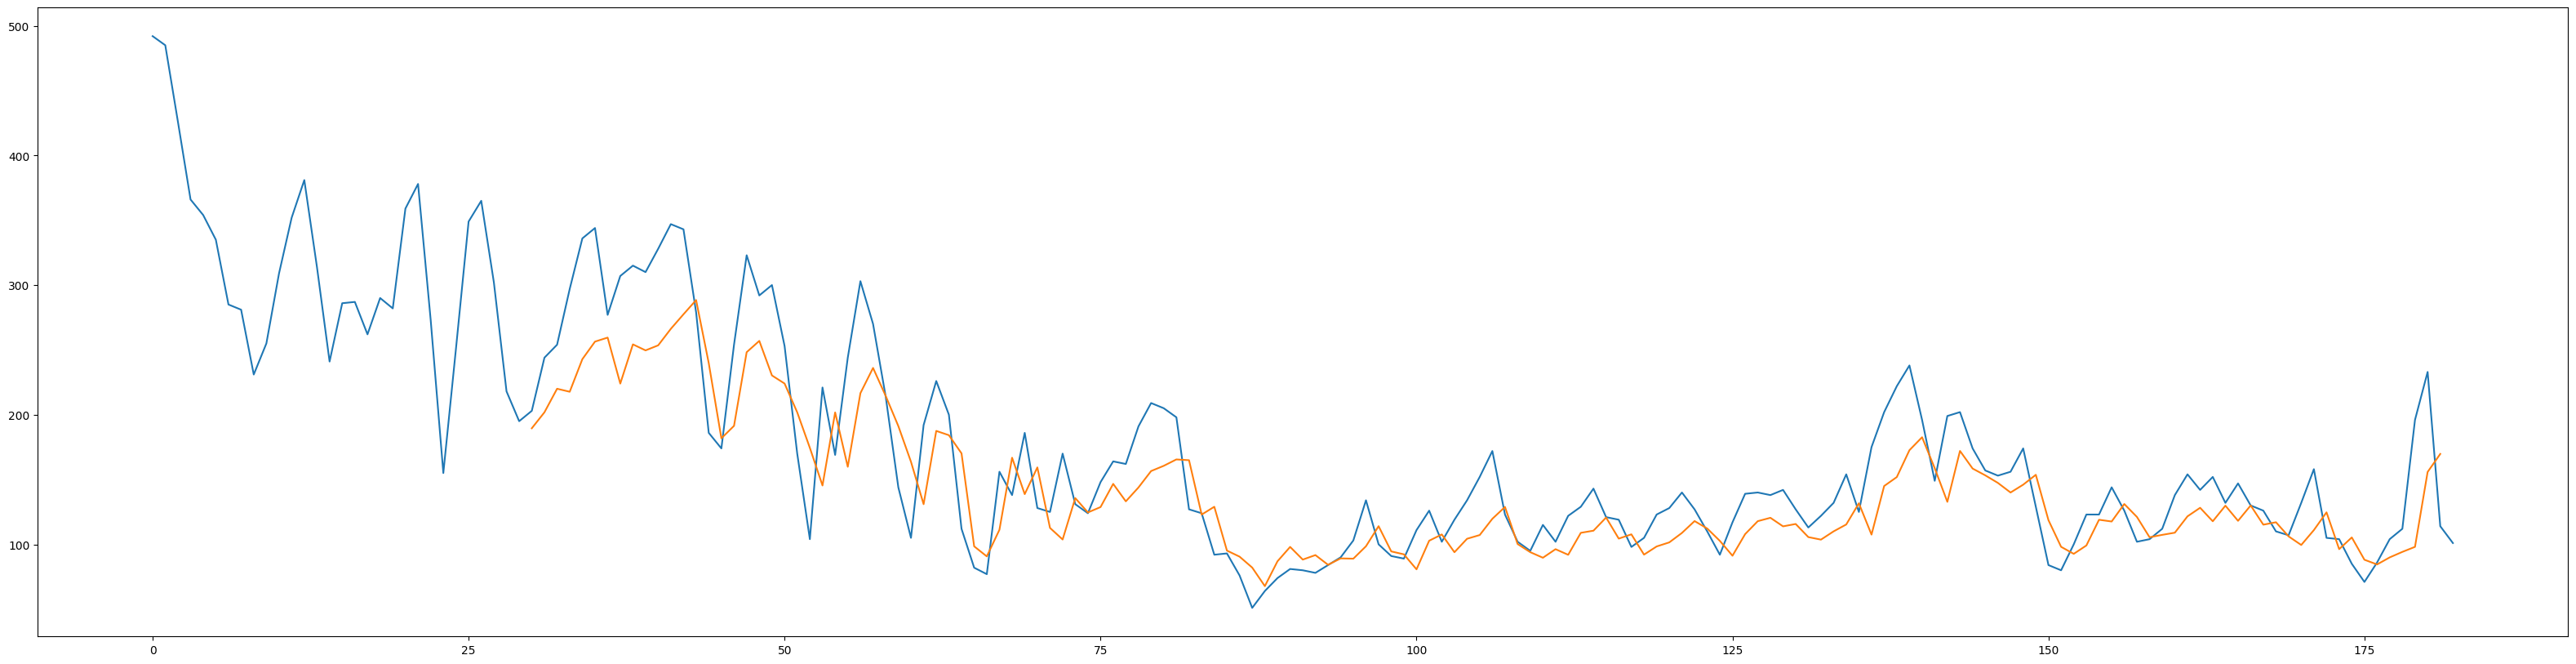

In [139]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[29+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

In [140]:
# predicting 2020 AQI 
data20=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year==2020  ) &(data_pre.Date.dt.month==6)]['AQI'].dropna()
dataset=np.array(data20)
dataset

array([100., 123., 123., 144., 126., 102., 104., 112., 138., 154., 142.,
       152., 132., 147., 130., 126., 110., 107., 132., 158., 105., 104.,
        85.,  71.,  86., 104., 112., 196., 233., 114.])

In [141]:
def predict(num_prediction, model):
    prediction_list = dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = np.array(prediction_list[-look_back:])
        x = np.reshape(x,(1, 1, 30))
        out = model.predict(x)
       # print(scaler.inverse_transform(out))
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

num_prediction = 365
forecast = predict(num_prediction, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

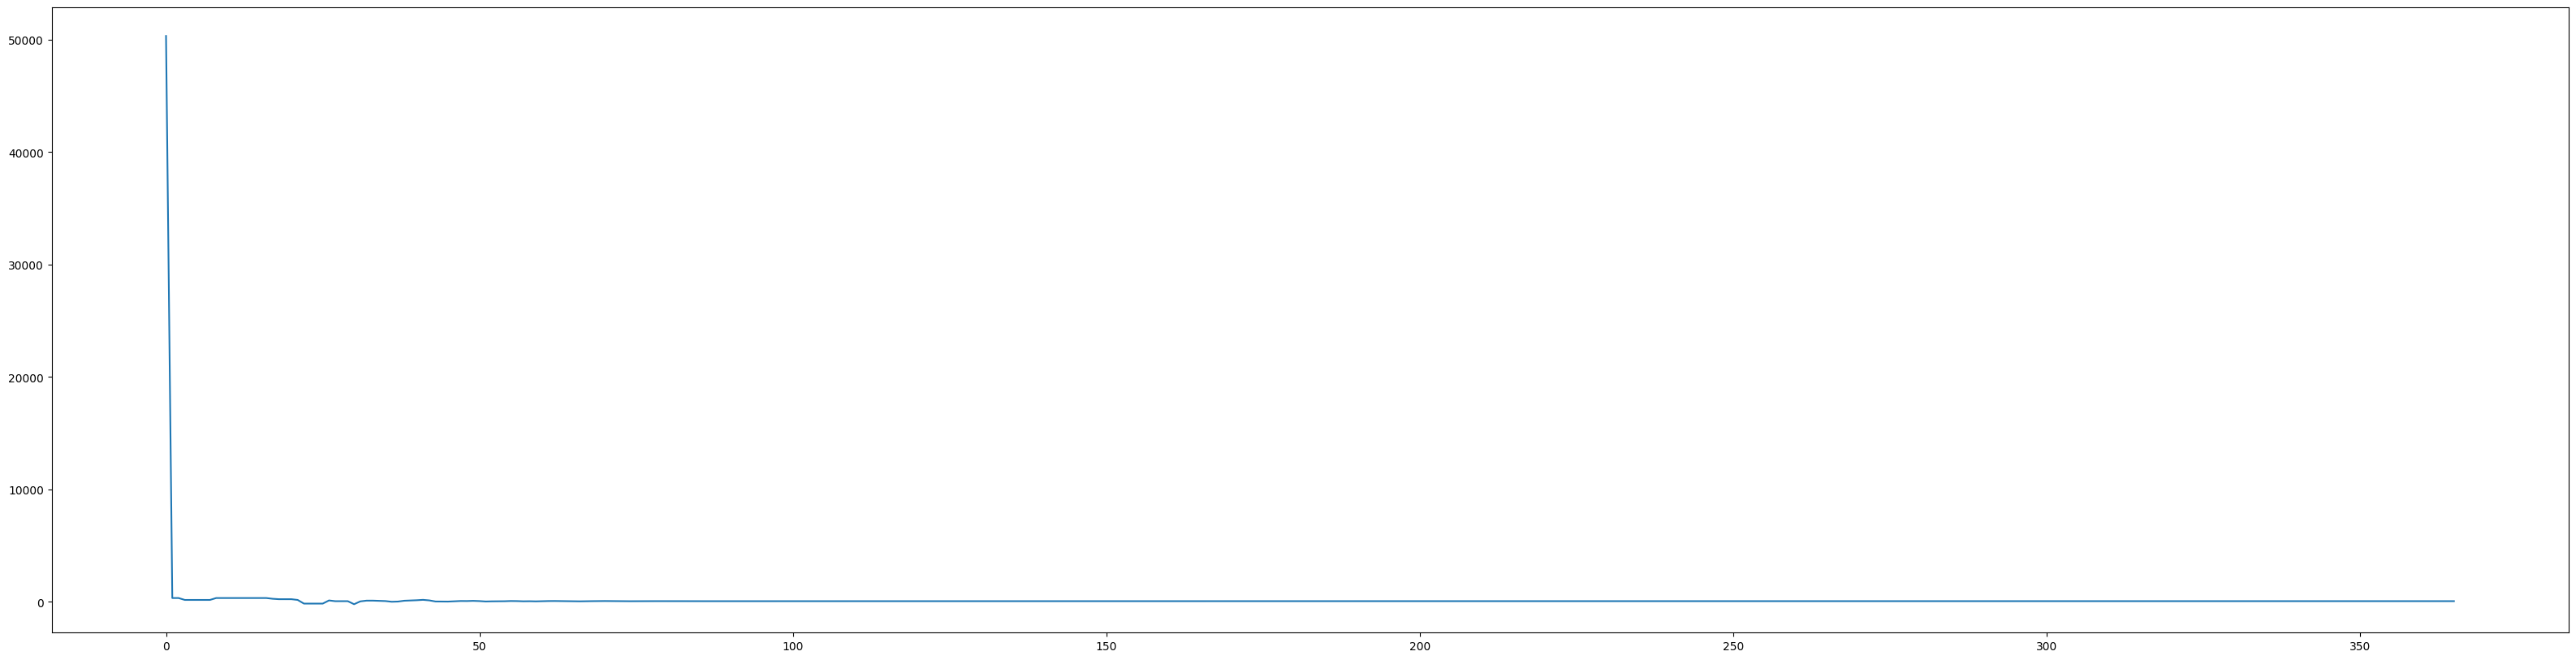

In [142]:

fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(forecast.reshape(-1,1)))


#  Clustering with Time series

In [143]:
## clustering with Time series
time_series=pd.Series()

for i in data_pre['City'].unique():
    time_series.loc[i]=data_pre[data_pre['City']==i]['AQI']
    



In [144]:
k={}
for i in data_pre['City'].unique():
        k[i]=len(time_series.loc[i])
        


In [145]:
k=data_pre[data_pre['City']=='Visakhapatnam']['Date'].sort_values().head(1).reset_index(drop = True)[0].date()
print(k)

2016-07-01


In [146]:
cities=[]
for i in data_pre['City'].unique():
    k=data_pre[data_pre['City']==i]['Date'].sort_values().head(1).reset_index(drop = True)[0].date()
    y=data_pre[data_pre['City']==i]['Date'].sort_values().tail(1).reset_index(drop = True)[0].date()
    if (y-k).days>1000:
        cities.append(i)
        print(i+' '+str(k)+' ' +str(y)+ ' '+str((y-k).days))

Ahmedabad 2015-01-01 2020-07-01 2008
Amritsar 2017-02-27 2020-07-01 1220
Bengaluru 2015-01-01 2020-07-01 2008
Chennai 2015-01-01 2020-07-01 2008
Delhi 2015-01-01 2020-07-01 2008
Gurugram 2015-11-27 2020-07-01 1678
Hyderabad 2015-01-04 2020-07-01 2005
Jaipur 2017-06-14 2020-07-01 1113
Jorapokhar 2017-04-20 2020-07-01 1168
Lucknow 2015-01-01 2020-07-01 2008
Mumbai 2015-01-01 2020-07-01 2008
Patna 2015-06-01 2020-07-01 1857
Thiruvananthapuram 2017-06-16 2020-07-01 1111
Visakhapatnam 2016-07-01 2020-07-01 1461


In [147]:
time_series=[]
for i in cities:
    data=data_pre[data_pre['City']==i][['Date','AQI']]
    city=pd.DataFrame(data, columns = ['Date', 'AQI'])
    city.set_index("Date",inplace=True)
    # set the date columns as index
    city.sort_index(inplace=True)
    all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
    time_series.append(city.reindex(all_times))


#### Data Preprocessing

### NULL_Values

#### removing all cities which have nulls over 30 % in data

In [148]:
final_cit=[]
remov=[]
for i,j in enumerate(time_series):
    if j['AQI'].isnull().mean()<0.3:
        print(cities[i],j['AQI'].isnull().mean())
        final_cit.append(cities[i])
    else:
        remov.append(i)
          
tim_series=[i for i in time_series if i['AQI'].isnull().mean()<0.3 ]  
len(tim_series)

Bengaluru 0.04927824788451966
Chennai 0.06222000995520159
Delhi 0.004977600796416127
Gurugram 0.27675460428073667
Hyderabad 0.06421105027376804
Lucknow 0.05774016923842708
Patna 0.273768043802887


7

In [149]:
for cit in cities:
    print(cit,data_pre[data_pre['City']==cit]['AQI'].isnull().mean())
final_cit    

Ahmedabad 0.3359880537580886
Amritsar 0.07780507780507781
Bengaluru 0.04927824788451966
Chennai 0.06222000995520159
Delhi 0.004977600796416127
Gurugram 0.1346039309112567
Hyderabad 0.06281156530408774
Jaipur 0.017953321364452424
Jorapokhar 0.34046193327630453
Lucknow 0.05774016923842708
Mumbai 0.6142359382777501
Patna 0.2147470398277718
Thiruvananthapuram 0.0539568345323741
Visakhapatnam 0.19904240766073872


['Bengaluru', 'Chennai', 'Delhi', 'Gurugram', 'Hyderabad', 'Lucknow', 'Patna']

In [150]:
# for i in range(len(final_cit)):
#     tim_series[i]['AQI'].interpolate(method='quadratic',limit_direction="both",inplace=True)

In [151]:
import math
# a=tim_series[1].reset_index()
# b=a.apply(lambda x: fill_null(x['index'],x['AQI'],1) if math.isnan(x['AQI']) else x['AQI'],axis=1)
# all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
# b.index=all_times
# tim_series[1]['AQI']=b
# tim_series[1]


#### Made a function which replaces null values with a mean of all previous years over the same month and day
#### Example - Replacing null value on 2015/1/1 with mean of (2016/1/1,2017/1/1, 2018/1/1 ......)

In [152]:
def fill_null(x,y,i):
    a=tim_series[i].reset_index()
    return a[(a['index'].dt.month==x.month) & (a['index'].dt.day==x.day)]['AQI'].mean()
     
for i in range(len(tim_series)):
    
    if tim_series[i]['AQI'].isnull().sum()>0:
        a=tim_series[i].reset_index()
        b=a.apply(lambda x: fill_null(x['index'],x['AQI'],i) if math.isnan(x['AQI']) else x['AQI'],axis=1)
        all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
        b.index=all_times
        tim_series[i]['AQI']=b

#### Total null values

In [153]:
sum=0
for i in range(len(tim_series)):
    sum+=tim_series[i]['AQI'].isnull().sum()
print(sum)    

0


#### Time series plot of all cities

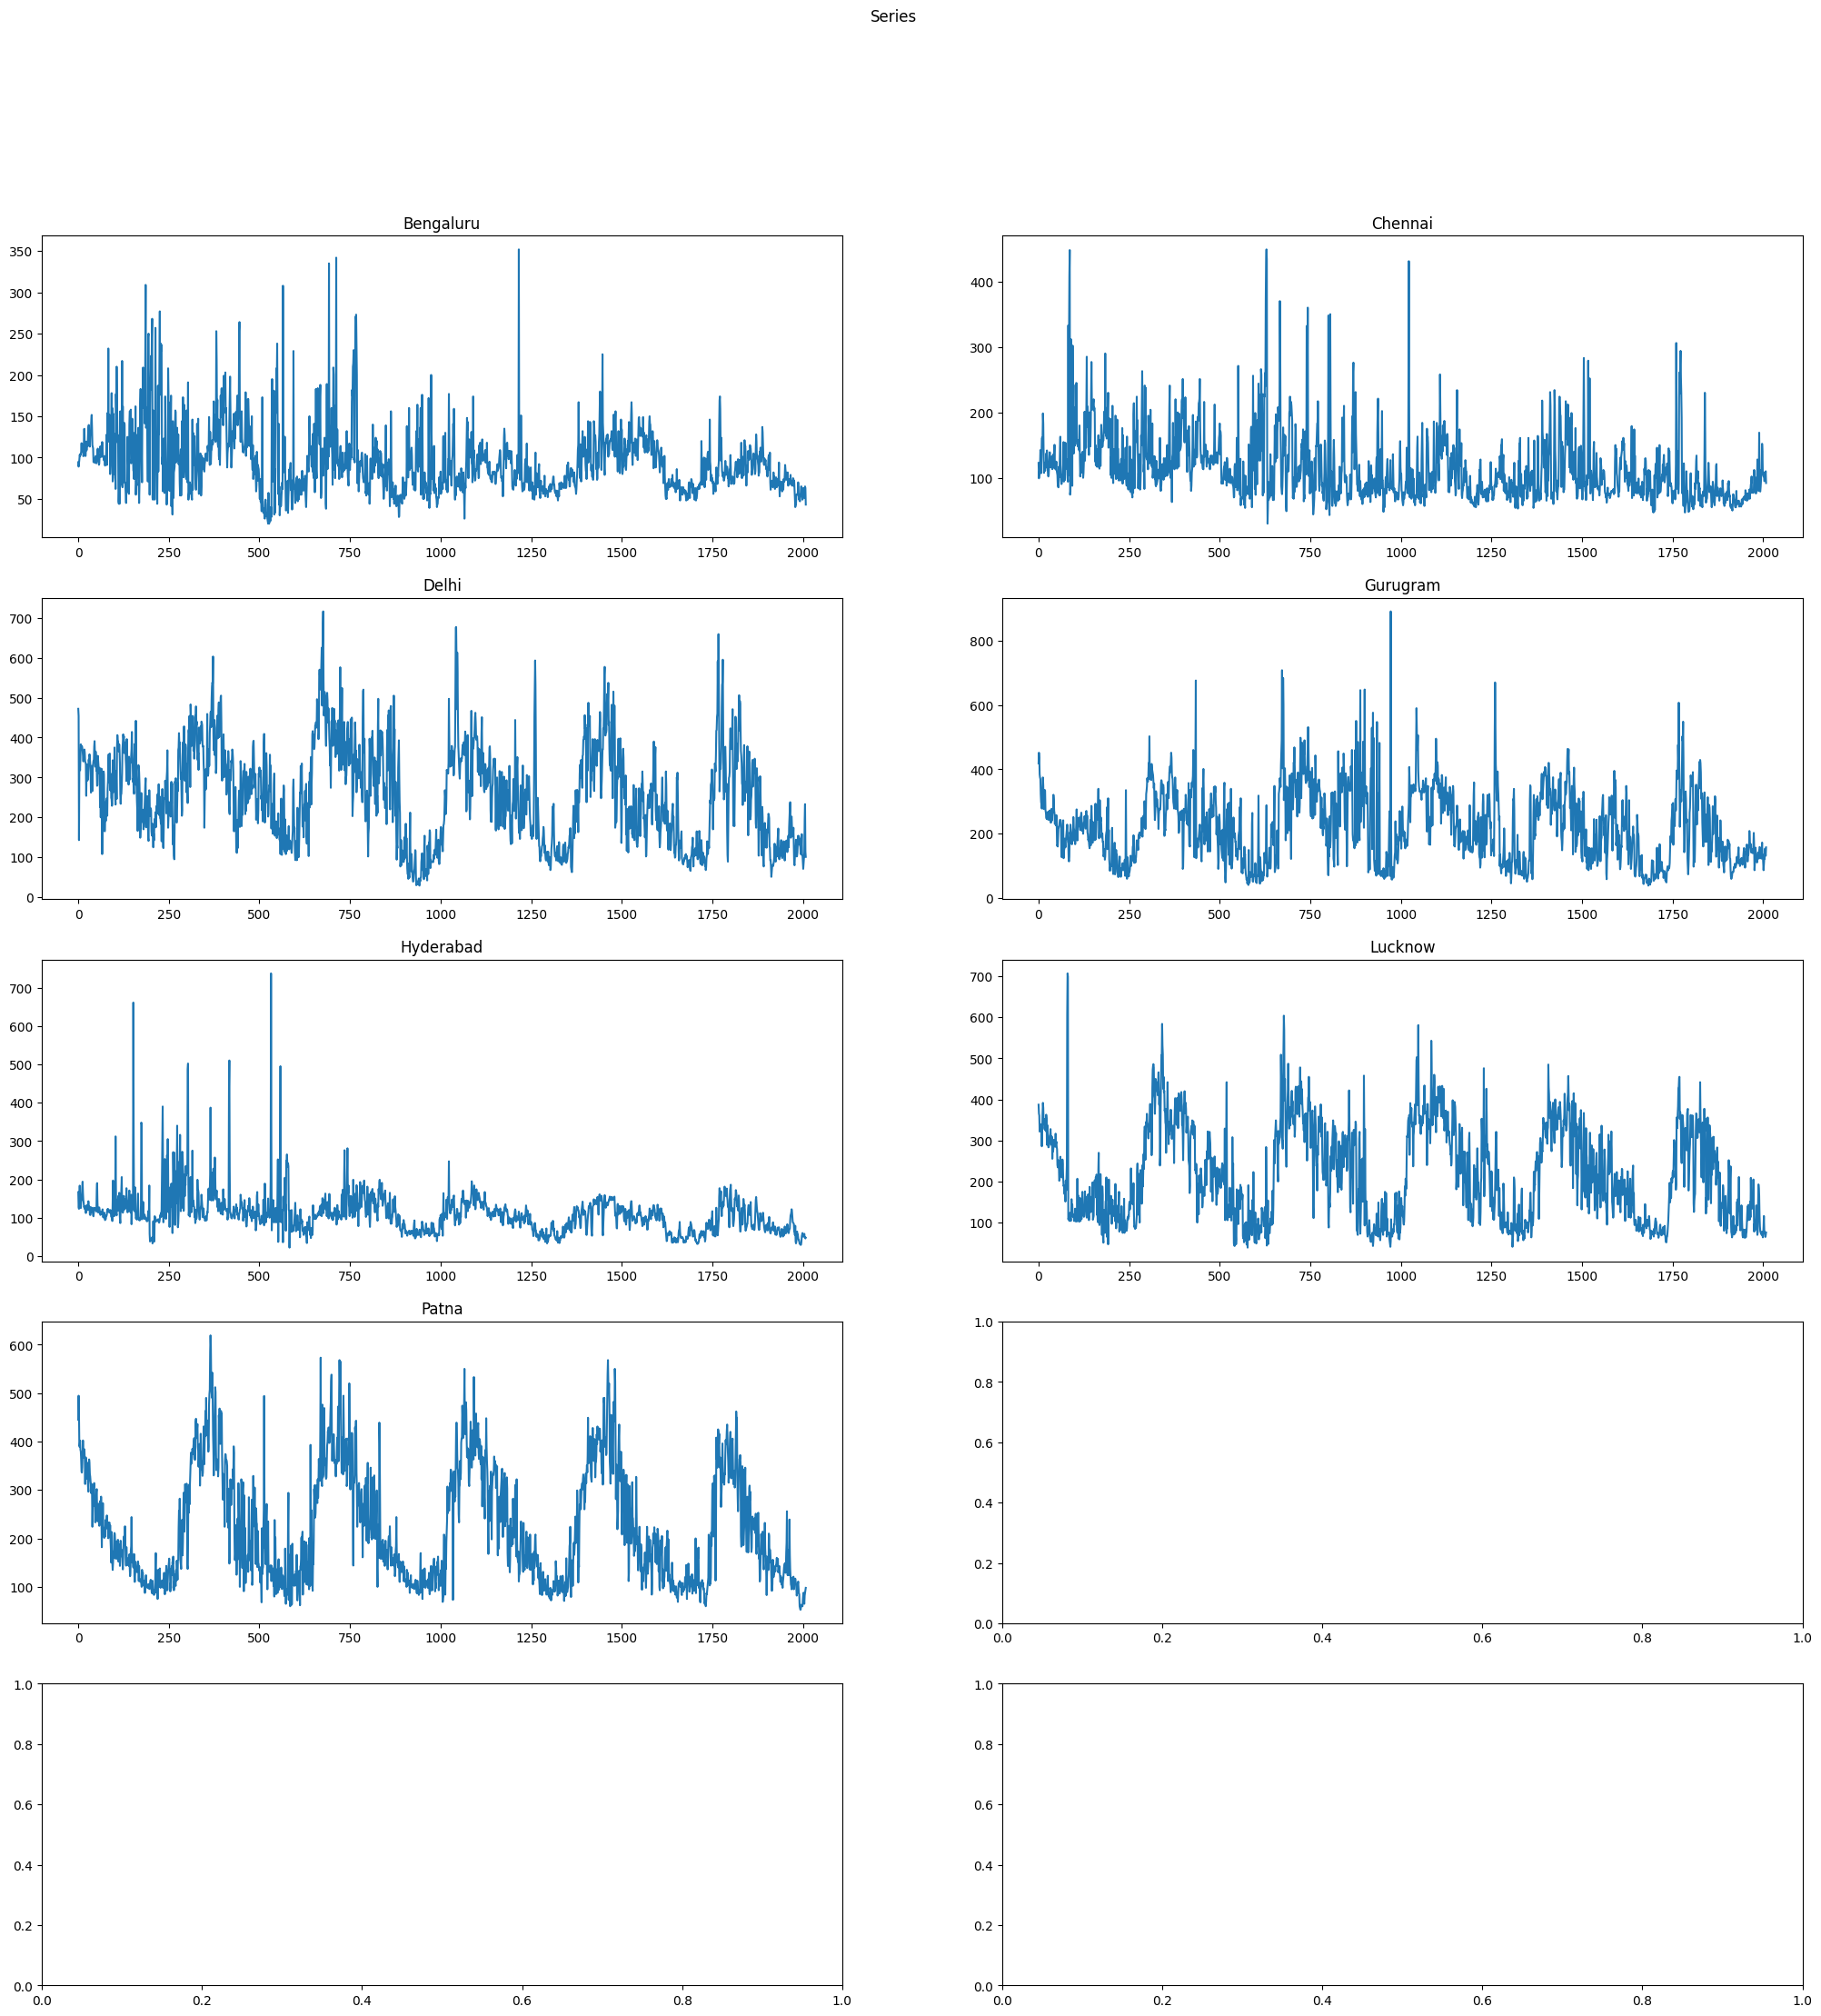

In [154]:
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].plot(tim_series[i*2+j]['AQI'].values)
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

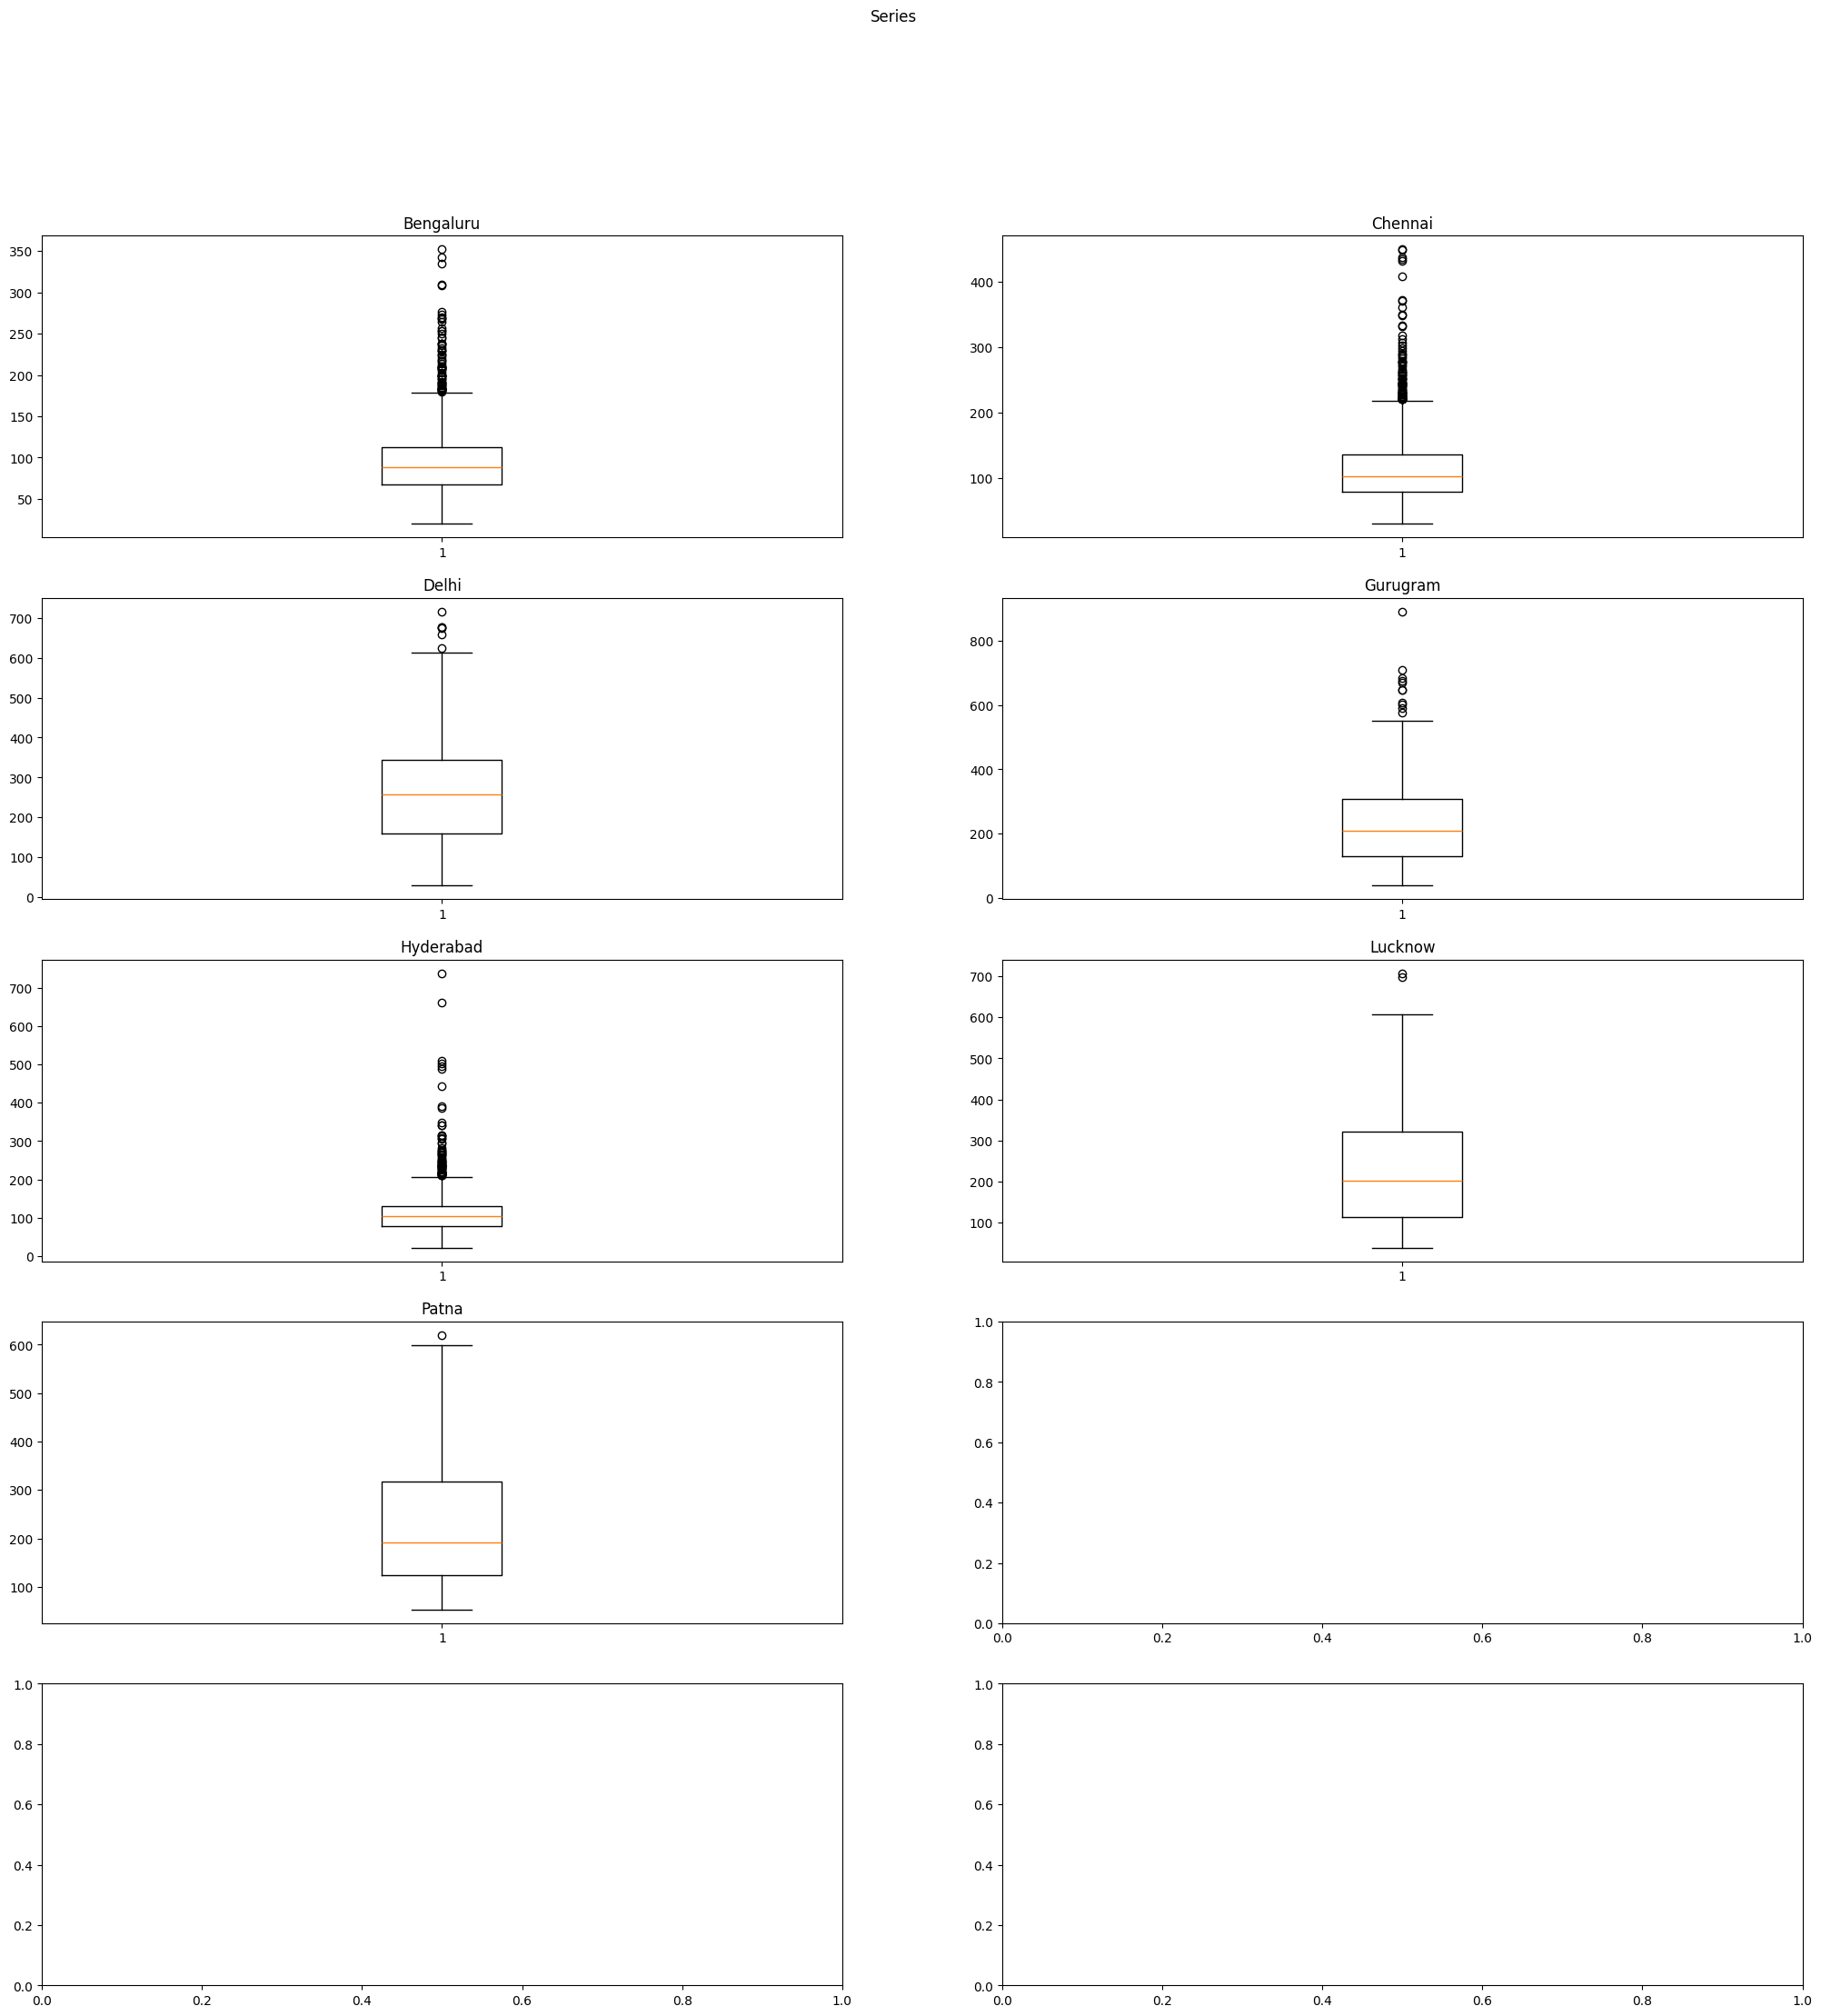

In [155]:
# outliers 
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].boxplot(tim_series[i*2+j]['AQI'])
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

### Outliers

#### Replacing outliers with median

In [156]:
for i in range(len(tim_series)):
    Q1 = tim_series[i]['AQI'].quantile(0.25)
    Q3 = tim_series[i]['AQI'].quantile(0.75)
    IQR = Q3 - Q1
    print(final_cit[i],((tim_series[i]['AQI'] < (Q1 - 1.5 * IQR)) | (tim_series[i]['AQI'] > (Q3 + 1.5 * IQR))).sum())

Bengaluru 67
Chennai 78
Delhi 6
Gurugram 11
Hyderabad 66
Lucknow 2
Patna 1


In [157]:
for i in range(len(tim_series)):
    Q1 = tim_series[i]['AQI'].quantile(0.25)
    Q3 = tim_series[i]['AQI'].quantile(0.75)
    IQR = Q3 - Q1
    mask = (tim_series[i]['AQI'] < (Q1 - 1.5 * IQR)) | (tim_series[i]['AQI'] > (Q3 + 1.5 * IQR))
    tim_series[i]['AQI'][mask] = tim_series[i]['AQI'].median()

/tmp/ipykernel_397121/3326074735.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tim_series[i]['AQI'][mask] = tim_series[i]['AQI'].median()
/tmp/ipykernel_397121/3326074735.py:6: FutureWarning: ChainedAssignmentError: behaviour will chan

In [158]:
# tim_series[0]['AQI'][tim_series[0]['AQI']>500] = 500

/tmp/ipykernel_397121/3593791171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tim_series[0])


<Axes: ylabel='Density'>

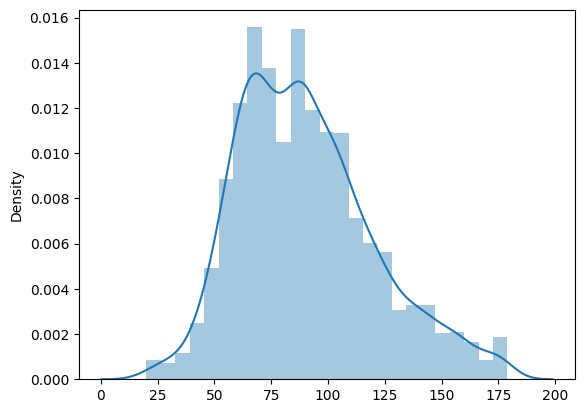

In [159]:
# Observing the distribution after preprocessing
sns.distplot(tim_series[0])

In [160]:
tim_series[0].index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=2009, freq='D')

In [161]:
data_series=tim_series.copy()
for i in range(len(final_cit)):
    data_series[i]['City']=final_cit[i]
    data_series[i]['Date']=tim_series[i].index
data_series
data_preprocessed=pd.concat(data_series)
data_preprocessed

AQI       City       Date
2015-01-01   94.4  Bengaluru 2015-01-01
2015-01-02   89.0  Bengaluru 2015-01-02
2015-01-03   93.0  Bengaluru 2015-01-03
2015-01-04   97.4  Bengaluru 2015-01-04
2015-01-05  103.2  Bengaluru 2015-01-05
...           ...        ...        ...
2020-06-27   65.0      Patna 2020-06-27
2020-06-28   82.0      Patna 2020-06-28
2020-06-29   88.0      Patna 2020-06-29
2020-06-30   93.0      Patna 2020-06-30
2020-07-01   98.0      Patna 2020-07-01

[14063 rows x 3 columns]

In [162]:
data_preprocessed.to_csv("data_preprocessed.csv", index=False)

In [163]:
 #sma_ahmedabad= df['AvgTemperature'].rolling(window=5).mean()

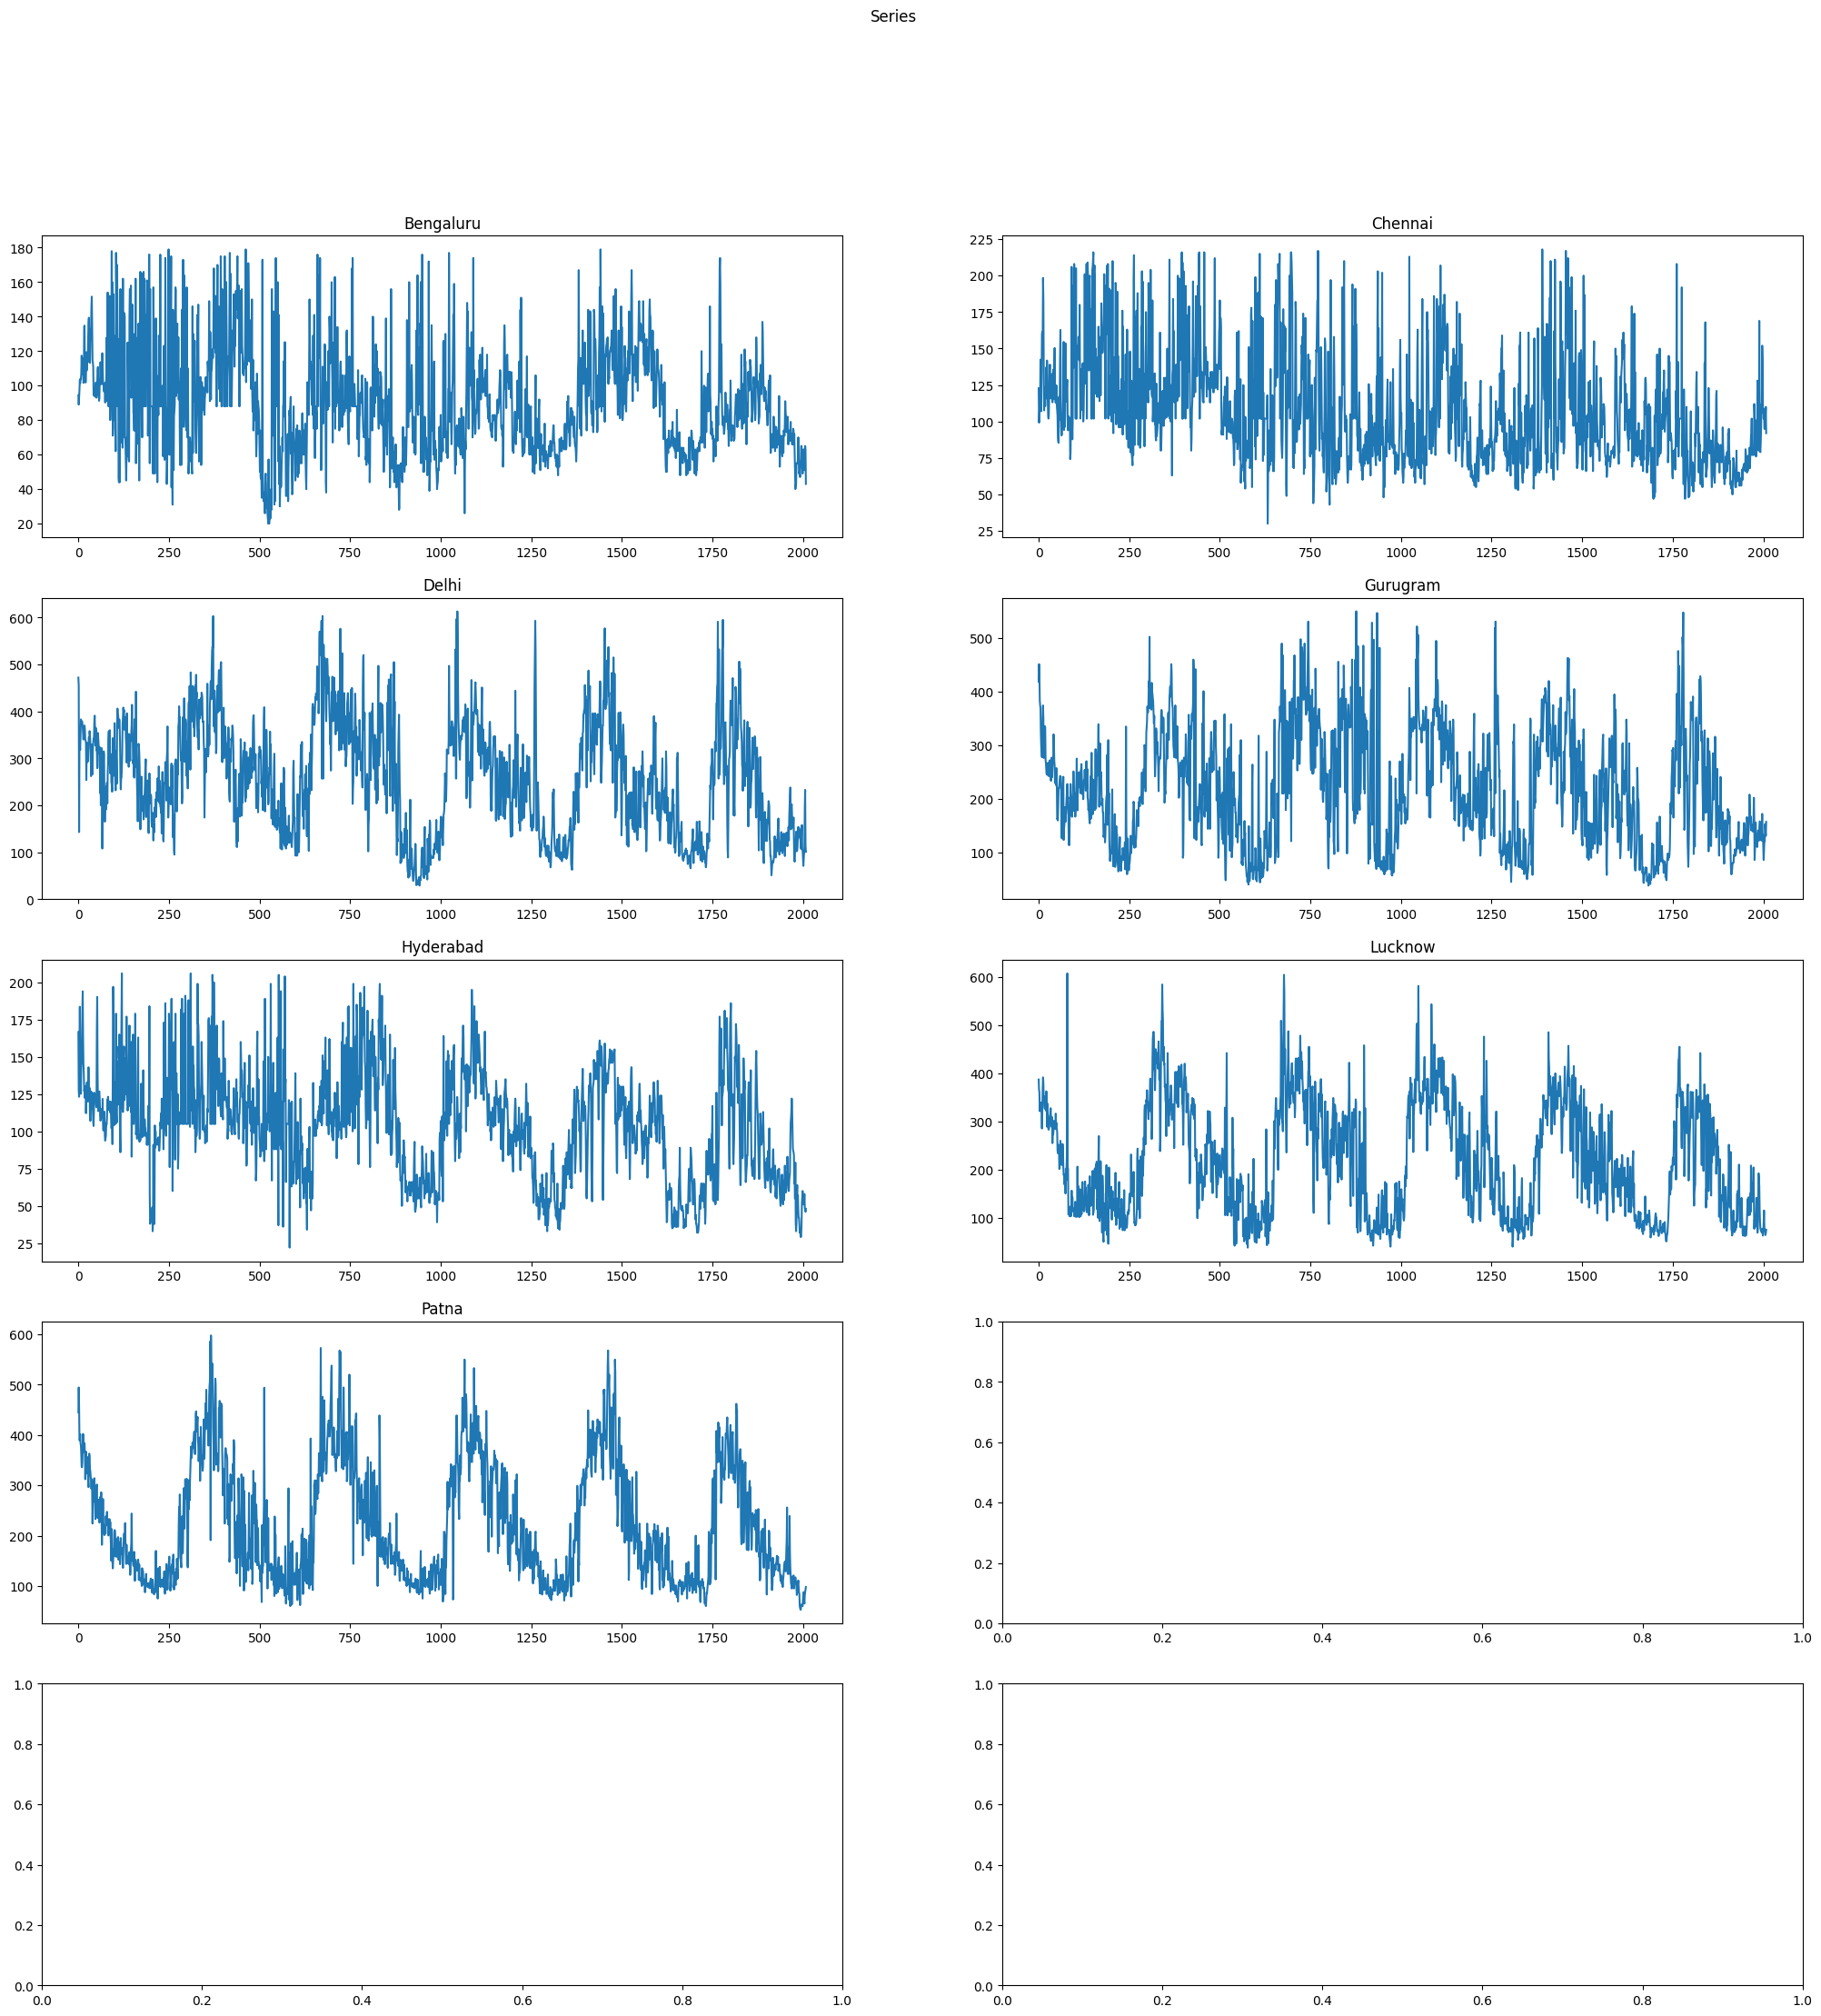

In [164]:
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].plot(tim_series[i*2+j]['AQI'].values)
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

In [165]:
!pip install tslearn

In [166]:
tim_org=tim_series.copy()
tim_org

[              AQI       City       Date
 2015-01-01   94.4  Bengaluru 2015-01-01
 2015-01-02   89.0  Bengaluru 2015-01-02
 2015-01-03   93.0  Bengaluru 2015-01-03
 2015-01-04   97.4  Bengaluru 2015-01-04
 2015-01-05  103.2  Bengaluru 2015-01-05
 ...           ...        ...        ...
 2020-06-27   51.0  Bengaluru 2020-06-27
 2020-06-28   61.0  Bengaluru 2020-06-28
 2020-06-29   65.0  Bengaluru 2020-06-29
 2020-06-30   63.0  Bengaluru 2020-06-30
 2020-07-01   43.0  Bengaluru 2020-07-01
 
 [2009 rows x 3 columns],
               AQI     City       Date
 2015-01-01  122.8  Chennai 2015-01-01
 2015-01-02   99.2  Chennai 2015-01-02
 2015-01-03  105.2  Chennai 2015-01-03
 2015-01-04  114.2  Chennai 2015-01-04
 2015-01-05  118.0  Chennai 2015-01-05
 ...           ...      ...        ...
 2020-06-27   95.0  Chennai 2020-06-27
 2020-06-28   98.0  Chennai 2020-06-28
 2020-06-29  104.0  Chennai 2020-06-29
 2020-06-30  110.0  Chennai 2020-06-30
 2020-07-01   92.0  Chennai 2020-07-01
 
 [2009 row

### Normalizing

### Normalizing the data

In [167]:
tim_series=[i[['AQI']] for i in tim_series ]


In [168]:
mySeries=tim_series
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = scaler.fit_transform(mySeries[i])
tim_series=mySeries

#### Applying k-mean clustering with dynamic time warping  as metric ( not euclidian )

In [169]:
import math
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
cluster_count = math.ceil(math.sqrt(len(tim_series))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=0)

labels = km.fit_predict(tim_series)

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py)

In [ ]:
tim_series=tim_org


In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(tim_series))))
from tslearn.barycenters import dtw_barycenter_averaging

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(tim_series[i]['AQI'].reset_index(),c="gray",alpha=0.4)
                cluster.append(tim_series[i]['AQI'])
    if len(cluster) > 0:
         axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()
        

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [ ]:
tim_series

In [ ]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(final_cit,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

#### As we have seen in EDA
#### Delhi, Gurugram, lucknow and patna are consitent top 5 mean AQI over all cities
#### Algo has segregated them with seperate cluster

In [ ]:
#tim_T[0]

# Applying PCA and doing clustering again
#### For clustering time series we take data over evry unit time as seperate feature which makes no of columns huge for every city  
#### We're applying pca as  this dataset has 2009  features which is pretty huge(Curse of dimensionality)


In [ ]:
data

In [ ]:
data=np.array([d.values for d in tim_series]) 
# reshaped_data = data.reshape((len(tim_series),2009))
tim_T=[i.T for i in mySeries]
transf_series=np.concatenate(tim_T)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
mySeries_transformed = pca.fit_transform(transf_series)

In [ ]:
mySeries_transformed.shape
mySeries=tim_series

In [ ]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(mySeries_transformed)

In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i]['AQI'].reset_index(),c="gray",alpha=0.4)
                cluster.append(mySeries[i]['AQI'])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [ ]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(final_cit,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

#  Got same  results even  after applying PCA

#### 